# Prepare for data and environment

In [1]:
!pip install matplotlib --upgrade
!pip install quandl --upgrade
!pip install yahoo-finance --upgrade

#generic
%matplotlib inline
from __future__ import print_function

import numpy as np
import time
import quandl 
import matplotlib.pyplot as plt

from yahoo_finance import Share



def get_data_by_key(key, data):
    data_it = iter(data)
    return_data = []
    flag = True
    for d in data_it:
        return_data.append(d[key])
        
    return np.array(return_data)

def get_data_by_list(name_list, start_date, end_date, data_type="Open"):
    share_list = []
    new_name_list = []
    for name in name_list:
        try:
            share_list.append(Share(name))
            new_name_list.append(name)
        except:
            pass
    
    stock_data_list = []
    date = []
    flag = True
    N_data = 0
    fail_name_list = []
    ret_name_list = []
    for idx, share in enumerate(share_list):
        name = new_name_list[idx]
        try:
            hist_data = share.get_historical(start_date=start_date, end_date=end_date)
            stock_data = map(float, get_data_by_key(key=data_type, data=hist_data))
            n_data = len(stock_data)
            if n_data == 0:
                fail_name_list.append(name)
            date.append(get_data_by_key(key='Date', data=hist_data))
            stock_data_list.append(stock_data)
            ret_name_list.append(name)
        except:
            pass
    print ("fail_name_list: ", fail_name_list)
    return np.array(stock_data_list).T, date, ret_name_list

Requirement already up-to-date: matplotlib in /usr/local/lib/python2.7/dist-packages
Requirement already up-to-date: numpy>=1.6 in /usr/local/lib/python2.7/dist-packages (from matplotlib)
Requirement already up-to-date: python-dateutil in /usr/local/lib/python2.7/dist-packages (from matplotlib)
Requirement already up-to-date: pytz in /usr/local/lib/python2.7/dist-packages (from matplotlib)
Requirement already up-to-date: cycler in /usr/local/lib/python2.7/dist-packages (from matplotlib)
Requirement already up-to-date: pyparsing!=2.0.4,>=1.5.6 in /usr/local/lib/python2.7/dist-packages (from matplotlib)
Cleaning up...
Requirement already up-to-date: quandl in /usr/local/lib/python2.7/dist-packages
Cleaning up...
Requirement already up-to-date: yahoo-finance in /usr/local/lib/python2.7/dist-packages
Requirement already up-to-date: pytz in /usr/local/lib/python2.7/dist-packages (from yahoo-finance)
Requirement already up-to-date: simplejson in /usr/local/lib/python2.7/dist-packages (from y

In [2]:
energy = ["PTR", "XOM", "CVX", "RDS-A", "BP", "TOT", "SLB", "KMI", "COP", "CEO", 
          "E", "STO", "OXY", "PBR", "EOG", "APC", "SU", "ENB", "HAL", "WMB"]
financial = ["WFC", "JPM", "HSBC", "BAC", "C", "SAN", "MTU", "RY", "WBK", "TD", "GS", 
             "LYG", "AXP", "AIG", "MS", "ITUB", "BCS", "BBVA"]
healthcare = ["NVS", "JNJ", "PFE", "MRK", "GILD", "SNY", "AMGN", "NVO", "GSK", "UNH",
             "MDT", "BMY", "CELG", "BIIB", "AZN", "LLY", "ABT", "AGN", "VRX", "TEVA",
             "TMO", "SHPG", "REGN"]
buisiness = ["ACN", "LMT", "CNI", "FDX", "DAL", "CSX", "AAL", "CP", "NSC", "NOC", "LUV"]
telecom = ["CHL", "VZ", "T", "VOD", "NTT", "AMX", "CHA", "BT", "CHU", "ORAN", "BCE",
           "CHT", "SKM", "TI", "TU", "S", "TLK", "DUK", "NGG", "D", "SO", "EXC", "KEP",
          "AEP", "SRE", "PCG", "HNP", "PPL", "PEG", "EIX", "ETP", "ED", "ENI", "XEL", "ES", "FE"]
hardware = ["AAPL", "ORCL", "IBM", "INTC", "CSCO", "TSM", "QCOM", "HPQ", "TXN", "EMC",
           "CAJ", "ASML", "ERIC", "SNE", "AVGO", "MU", "GLW", "NXPI", "NOK",
           "AMAT", "WDC", "WIT", "ADI", "STX", "APH"]
software = ["MSFT", "GOOGL", "BIDU", "EBAY", "SAP", "CRM", "YHOO", "VMW",
            "ADBE", "CTSH", "INFY", "INTU", "LNKD", "RHT", "NTES", "CHKP", 
            "CA", "ADSK", "AKAM", "NVDA"]
industrial = ["GE", "V", "MA", "UTX", "MMM", "BA", "UNP", "UPS", "HON", "DHR", "CAT", 
              "ABB", "GD", "ADP", "EMR", "ITW", "ECL", "TEL", "PCAR", "WM"]
manufacturing = ["TM", "HMC", "F", "GM", "JCI", "TSLA", "TTM", "CMI", "DLPH", "MGA",
                "CMI", "DLPH", "MGA", "GPC", "BWA", "HOG", "ALV", "HAR", "LEA", "LKQ", 
                 "WBC", "GT", "FCAU", "NSANY", "NAV"]
consumer = ["PG", "BUD", "KO", "PEP", "UL", "PM", "BTI", "MO", "ABEV", "DEO", "MDLZ",
            "CL", "MON", "MCK", "KMB", "WHR", "DIS", "CMCSA", "FOXA", "TWX", "TWC",
           "DISH", "CBS", "DISCA", "TV", "CHTR", "QVCA", "OMC", "NLSN", 
           "PSO", "SJR", "NFLX"]
diversified = ["BRK-A", "BRK-B", "UTX", "BC", "RTN", "OLN", "ITT", "MSBHY", "KWHIY", 
               "ABB", "IEP", "GE"]
retailing = ["WMT", "AMZN", "HD", "MCD", "NKE", "SBUX", "CVS", "WBA", "PCLN", "COST", 
            "TGT", "TJX", "LVS", "YUM", "CCL", "LUX", "DG", "M", "AZO", "ROST", "CMG", "GPS", 
            "DLTR", "RCL", "KSS", "HOT", "JWN"]

input_list = energy + financial + healthcare + buisiness + telecom\
+ hardware + software + industrial + manufacturing + consumer + diversified + retailing
print (len(input_list))

269


In [3]:
import time
print ("Started!!")

st = time.time()
start_date="2014-04-01"
end_date="2016-04-01"
input_data, date, input_list = get_data_by_list(input_list, start_date=start_date, end_date=end_date) 
sp = quandl.get("YAHOO/INDEX_GSPC", start_date=start_date, end_date=end_date)
target_data = np.array(sp['Open'])
elapsed = time.time() - st
print ("time for getting training_data:", elapsed)

Started!!
fail_name_list:  []
time for getting training_data: 1094.37403202


In [4]:
target_data = target_data.reshape(len(target_data), 1)
print (target_data.shape)

(505, 1)


# Vanilla LSTM

Set UP!

In [5]:
!sudo pip install  --upgrade https://storage.googleapis.com/tensorflow/linux/cpu/tensorflow-0.9.0rc0-cp27-none-linux_x86_64.whl

Downloading/unpacking https://storage.googleapis.com/tensorflow/linux/cpu/tensorflow-0.9.0rc0-cp27-none-linux_x86_64.whl
Requirement already up-to-date: numpy>=1.8.2 in /usr/local/lib/python2.7/dist-packages (from tensorflow==0.9.0rc0)
Requirement already up-to-date: six>=1.10.0 in /usr/local/lib/python2.7/dist-packages (from tensorflow==0.9.0rc0)
Downloading/unpacking wheel from https://pypi.python.org/packages/8a/e9/8468cd68b582b06ef554be0b96b59f59779627131aad48f8a5bce4b13450/wheel-0.29.0-py2.py3-none-any.whl#md5=d7db45db5c131af262b8ffccde46a88a (from tensorflow==0.9.0rc0)
Requirement already up-to-date: protobuf==3.0.0b2 in /usr/local/lib/python2.7/dist-packages (from tensorflow==0.9.0rc0)
  Found existing installation: wheel 0.24.0
    Not uninstalling wheel at /usr/lib/python2.7/dist-packages, owned by OS
Cleaning up...


In [6]:
import tensorflow as tf

In [255]:
class VanillaLSTM(object):
    
    def __init__(self, layers, activation=tf.sigmoid, is_initialize=True):
        """Initialize Vanilla LSTM
        
        Args:
            layers (List(int)): each element should be the number of components
            is_initialized(bool): if this variable is True, glaph will be initialized
        """
        self.layers = layers
        self.activation = activation
        
        if is_initialize is True:
            sess =tf.InteractiveSession()
            tf.reset_default_graph()
            sess.close()  
        
    def weight_variable(self, shape):
        initial = tf.truncated_normal(shape, stddev=1.0)
        return tf.Variable(initial, name="weight")
        
    def bias_variable(self, shape):
        initial = tf.constant(0.0, shape=shape)
        return tf.Variable(initial, name="bias")
        
    def build_model(self, n_data, length):
        # build model for trainig
        self._input = tf.placeholder(tf.float32, [n_data, self.layers[0]])
        self._target = tf.placeholder(tf.float32, [n_data, self.layers[-1]])
        
        # when learning, we will split data which has shape (T, dim)
        # into (n_batch, dim) * (length)
        n_batch = int(n_data / length)
        input_split = tf.pack(tf.split(0, n_batch, self._input))
        input_tilde = []
        for i in xrange(length):
            input_tilde.append(input_split[:, i, :])
        
        # reshape for training
        target_split = tf.pack(tf.split(0, n_batch, self._target))
        target_tilde = []
        for i in xrange(length):
            target_tilde.append(target_split[:, i, :])
        target_tilde = tf.concat(0, target_tilde)
        
        # the name of variable scope will be layer0, layer1, ...
        x = input_tilde
        with tf.variable_scope("hidden"):
            # build LSTM graph for each layer
            self._cell = tf.nn.rnn_cell.BasicLSTMCell(self.layers[1])
            self._initial_state = self._cell.zero_state(n_batch, tf.float32)
            cell_outputs, state = tf.nn.rnn(
                cell=self._cell, 
                inputs=x, 
                initial_state=self._initial_state
            )
            self._final_state = state
            n_in = self.layers[1]
            n_out = self.layers[2]
            self.W = self.weight_variable([n_in, n_out])
            self.b = self.bias_variable([n_out])
            cell_outputs = tf.concat(0, cell_outputs)
            z = tf.matmul(cell_outputs, self.W) + self.b
            x = self.activation(z)
        
        # we will not apply activation function for the last layer
        self._output = z  
        
        # training graph
        self._learning_rate = tf.placeholder(tf.float32, shape=[], name="learning_rate")
        self.loss = tf.reduce_mean(tf.square(self._output - target_tilde))
        optimizer = tf.train.AdamOptimizer(learning_rate=self._learning_rate)
        self.train = optimizer.minimize(self.loss) 
        
    def build_pred_model(self, n_data):
        # build model for trainig
        self._input_pred = tf.placeholder(tf.float32, [n_data, self.layers[0]])
        input_tilde = tf.split(0, n_data, self._input_pred)
        # the name of variable scope will be layer0, layer1, ...
        x= input_tilde
        with tf.variable_scope("hidden", reuse=True):
            # build LSTM graph for prediction
            initial_state = self._cell.zero_state(1, tf.float32)
            cell_outputs, state = tf.nn.rnn(
                cell=self._cell, 
                inputs=x, 
                initial_state=initial_state
            )
            self._final_state = state
            n_in = self.layers[1]
            n_out = self.layers[2]
            cell_outputs = tf.concat(0, cell_outputs)
            z = tf.matmul(cell_outputs, self.W) + self.b
            x = self.activation(z)
      
        # we will not apply activation function for the last layer
        self._output_pred = z  
        
    
    def training(self, input_data, target_data, length=20, n_epochs=100,
                         learning_rate=1e-8, decay_rate=0.5, decay_freq=100):
        n_data = len(input_data)
        print_freq = int(n_epochs / 10)
        if print_freq == 0:
            print_freq = 1
        
        # build training graph
        n_batch = int(n_data / length)
        n_data_tilde = length * n_batch
        self.build_model(n_data_tilde, length)
        
        # we'll use only recent n_batch * n_split data 
        # because of garph's architechture
        input_data = input_data[n_data - n_data_tilde:]
        target_data = target_data[n_data - n_data_tilde:]
        
        # Add ops to save and restore all the variables.
        saver = tf.train.Saver()
        init_op = tf.initialize_all_variables()
        with tf.Session() as sess:
            sess.run(init_op)
            for epoch in xrange(n_epochs):
                # np.random.shuffle(batch_index)
                sess.run(self.train, 
                                feed_dict={self._input: input_data,
                                                     self._target: target_data,
                                                     self._learning_rate: learning_rate})
                if (epoch + 1) % decay_freq == 0:
                    learning_rate *= decay_rate
                    
                if epoch % print_freq == 0:
                    print ("loss:", 
                               self.loss.eval(session=sess, 
                                                      feed_dict={self._input: input_data,
                                                                           self._target: target_data}))     
                    print ("learning rate:", learning_rate)
            save_path = saver.save(sess, "/jupyter/tomoaki/model.ckpt")
            print("Model saved in file: %s" % save_path)
            
    def predict(self, input_data):
        n_data = len(input_data)
        self.build_pred_model(n_data)
        saver = tf.train.Saver()
        with  tf.Session() as sess:
            # Restore variables from disk.
            saver.restore(sess, "/jupyter/tomoaki/model.ckpt")
            print("Model restored.")
            output = self._output_pred.eval(session=sess,
                                                           feed_dict={self._input_pred: input_data})
        return output    

In [256]:
df_input = input_data[1:] / input_data[:-1] - 1.0
df_target = target_data[1:] / target_data[:-1] -1.0

start!
loss: 0.586299
learning rate: 0.01
loss: 1.06763e-09
learning rate: 0.003486784401
loss: 1.27646e-12
learning rate: 0.00121576654591
loss: 1.31002e-13
learning rate: 0.000423911582752
loss: 7.99232e-14
learning rate: 0.000147808829414
loss: 6.97326e-14
learning rate: 5.15377520732e-05
loss: 6.67299e-14
learning rate: 1.79701029991e-05
loss: 6.59106e-14
learning rate: 6.26578748218e-06
loss: 6.59891e-14
learning rate: 2.18474500528e-06
loss: 6.57657e-14
learning rate: 7.61773480459e-07
Model saved in file: /jupyter/tomoaki/model.ckpt
learning_time: 211.192155838
Model restored.
loss: 0.00161948744237


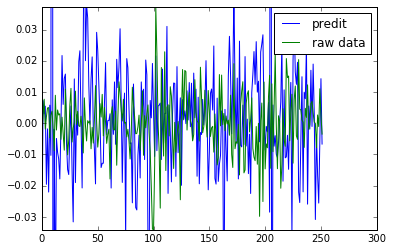

In [257]:
N = int(len(df_input) * 0.5)

input_train = df_input[:N]
target_train = df_target[:N]
input_pred = df_input[N:]
target_pred = df_target[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.3 * n_in)
n_out = 1
length=20

lstm = VanillaLSTM(layers=[n_in, n_hidden1, n_out], is_initialize=True)


print ("start!")
st_s = time.time()
lstm.training(input_train, target_train,
                      learning_rate=1e-2, decay_freq=100, decay_rate=0.9,
                      length=length, n_epochs=10000)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = lstm.predict(input_pred)
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

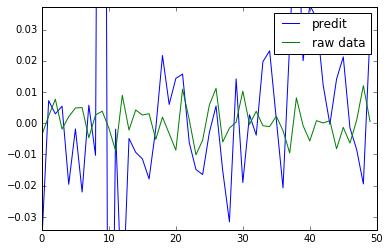

In [258]:
plt.plot(pred[:50], label="predit")
plt.plot(target_pred[:50], label="raw data")
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

As a comparison, let's use only n_batch history for prediction

In [259]:
class VanillaLSTM2(object):
    
    def __init__(self, layers, activation=tf.sigmoid, is_initialize=True):
        """Initialize Vanilla LSTM
        
        Args:
            layers (List(int)): each element should be the number of components
            is_initialized(bool): if this variable is True, glaph will be initialized
        """
        self.layers = layers
        self.activation = activation
        
        if is_initialize is True:
            sess =tf.InteractiveSession()
            tf.reset_default_graph()
            sess.close()  
        
    def weight_variable(self, shape):
        initial = tf.truncated_normal(shape, stddev=1.0)
        return tf.Variable(initial, name="weight")
        
    def bias_variable(self, shape):
        initial = tf.constant(0.0, shape=shape)
        return tf.Variable(initial, name="bias")
        
    def build_model(self, n_data, length):
        # build model for trainig
        self._input = tf.placeholder(tf.float32, [n_data, self.layers[0]])
        self._target = tf.placeholder(tf.float32, [n_data, self.layers[-1]])
        
        # when learning, we will split data which has shape (T, dim)
        # into (n_batch, dim) * (length)
        n_batch = int(n_data / length)
        input_split = tf.pack(tf.split(0, n_batch, self._input))
        input_tilde = []
        for i in xrange(length):
            input_tilde.append(input_split[:, i, :])
            
        # reshape for training
        target_split = tf.pack(tf.split(0, n_batch, self._target))
        target_tilde = []
        for i in xrange(length):
            target_tilde.append(target_split[:, i, :])
        target_tilde = tf.concat(0, target_tilde)
        
        # the name of variable scope will be layer0, layer1, ...
        x = input_tilde
        with tf.variable_scope("hidden"):
            # build LSTM graph for each layer
            self._cell = tf.nn.rnn_cell.BasicLSTMCell(self.layers[1])
            self._initial_state = self._cell.zero_state(n_batch, tf.float32)
            cell_outputs, state = tf.nn.rnn(
                cell=self._cell, 
                inputs=x, 
                initial_state=self._initial_state
            )
            self._final_state = state
            n_in = self.layers[1]
            n_out = self.layers[2]
            self.W = self.weight_variable([n_in, n_out])
            self.b = self.bias_variable([n_out])
            cell_outputs = tf.concat(0, cell_outputs)
            z = tf.matmul(cell_outputs, self.W) + self.b
            x = self.activation(z)
        
        # we will not apply activation function for the last layer
        self._output = z  
        
        # training graph
        self._learning_rate = tf.placeholder(tf.float32, shape=[], name="learning_rate")
        self.loss = tf.reduce_mean(tf.square(self._output - target_tilde))
        optimizer = tf.train.AdamOptimizer(learning_rate=self._learning_rate)
        self.train = optimizer.minimize(self.loss) 
        
    def build_pred_model(self, n_data):
        # build model for trainig
        self._input_pred = tf.placeholder(tf.float32, [n_data, self.layers[0]])
        input_tilde = tf.split(0, n_data, self._input_pred)
        # the name of variable scope will be layer0, layer1, ...
        x= input_tilde
        with tf.variable_scope("hidden", reuse=True):
            # build LSTM graph for prediction
            initial_state = self._cell.zero_state(1, tf.float32)
            cell_outputs, state = tf.nn.rnn(
                cell=self._cell, 
                inputs=x, 
                initial_state=initial_state
            )
            self._final_state = state
            n_in = self.layers[1]
            n_out = self.layers[2]
            cell_outputs = tf.concat(0, cell_outputs)
            z = tf.matmul(cell_outputs, self.W) + self.b
            x = self.activation(z)
      
        # we will not apply activation function for the last layer
        self._output_pred = z  
    
    def training(self, input_data, target_data, length=20, n_epochs=100,
                         learning_rate=1e-8, decay_rate=0.5, decay_freq=100):
        n_data = len(input_data)
        print_freq = int(n_epochs / 10)
        if print_freq == 0:
            print_freq = 1
        
        # build training graph
        n_batch = int(n_data / length)
        n_data_tilde = length * n_batch
        self.build_model(n_data_tilde, length)
        
        # we'll use only recent n_batch * n_split data 
        # because of garph's architechture
        input_data = input_data[n_data - n_data_tilde:]
        target_data = target_data[n_data - n_data_tilde:]
        
        # Add ops to save and restore all the variables.
        saver = tf.train.Saver()
        init_op = tf.initialize_all_variables()
        with tf.Session() as sess:
            sess.run(init_op)
            for epoch in xrange(n_epochs):
                # np.random.shuffle(batch_index)
                sess.run(self.train, 
                                feed_dict={self._input: input_data,
                                                     self._target: target_data,
                                                     self._learning_rate: learning_rate})
                if (epoch + 1) % decay_freq == 0:
                    learning_rate *= decay_rate
                    
                if epoch % print_freq == 0:
                    print ("loss:", 
                               self.loss.eval(session=sess, 
                                                      feed_dict={self._input: input_data,
                                                                           self._target: target_data}))     
                    print ("learning rate:", learning_rate)
            save_path = saver.save(sess, "/jupyter/tomoaki/model.ckpt")
            print("Model saved in file: %s" % save_path)
            
    def predict(self, input_data, length):
        n_data = len(input_data)
        self.build_pred_model(length)
        saver = tf.train.Saver()
        outputs = []
        with  tf.Session() as sess:
            # Restore variables from disk.
            saver.restore(sess, "/jupyter/tomoaki/model.ckpt")
            print("Model restored.")
            for i in xrange(n_data - length):
                beg = i
                end = i + length
                batch_input = input_data[beg:end]
                output = self._output_pred.eval(session=sess,
                                                                         feed_dict={self._input_pred: batch_input})
                outputs.append(output[-1])
        return outputs

start!
loss: 0.607621
learning rate: 0.01
loss: 3.54149e-09
learning rate: 0.003486784401
loss: 8.45242e-12
learning rate: 0.00121576654591
loss: 5.00313e-13
learning rate: 0.000423911582752
loss: 2.35336e-13
learning rate: 0.000147808829414
loss: 1.9069e-13
learning rate: 5.15377520732e-05
loss: 1.79017e-13
learning rate: 1.79701029991e-05
loss: 1.75411e-13
learning rate: 6.26578748218e-06
loss: 1.73948e-13
learning rate: 2.18474500528e-06
loss: 1.73541e-13
learning rate: 7.61773480459e-07
Model saved in file: /jupyter/tomoaki/model.ckpt
learning_time: 209.629117012
Model restored.
loss: 0.00112181402055


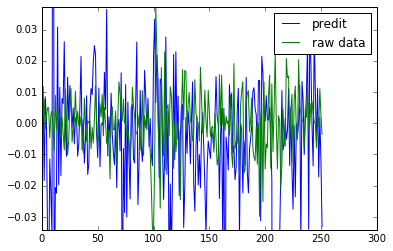

In [260]:
N = int(len(df_input) * 0.5)

length=20
input_train = df_input[:N]
target_train = df_target[:N]
input_pred = df_input[N - length:]
target_pred = df_target[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.3 * n_in)
n_out = 1


lstm = VanillaLSTM2(layers=[n_in, n_hidden1, n_out], is_initialize=True)


print ("start!")
st_s = time.time()
lstm.training(input_train, target_train,
                        learning_rate=1e-2, decay_freq=100, decay_rate=0.9,
                        length=length, n_epochs=10000)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = lstm.predict(input_pred, length)
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

# Grid LSTM

In [261]:
class GridLSTM(object):
    
    def __init__(self, n_in, n_hidden, n_out, n_layers, activation=tf.sigmoid, is_initialize=True):
        """Initialize Grid LSTM
        
        Args:
            n_in, n_hidden, n_out (int): the number of nodes of each layer
            n_layers (int): the number of hidden layers. 
                the shape of the network will be [n_in, n_hidden * n_layers, n_out]
            is_initialized(bool): if this variable is True, glaph will be initialized
        """
        self.n_in = n_in
        self.n_hidden = n_hidden
        self.n_out = n_out 
        self.n_layers = n_layers
        self.activation = activation
        
        if is_initialize is True:
            sess =tf.InteractiveSession()
            tf.reset_default_graph()
            sess.close()  
        
    def weight_variable(self, shape):
        initial = tf.truncated_normal(shape, stddev=1.0)
        return tf.Variable(initial, name="weight")
        
    def bias_variable(self, shape):
        initial = tf.constant(0.0, shape=shape)
        return tf.Variable(initial, name="bias")
        
    def build_model(self, n_data, length):
        # build model for trainig
        self._input = tf.placeholder(tf.float32, [n_data, self.n_in])
        self._target = tf.placeholder(tf.float32, [n_data, self.n_out])
        
        # when learning, we will split data which has shape (T, dim)
        # into (n_batch, dim) * (length)
        n_batch = int(n_data / length)
        input_split = tf.pack(tf.split(0, n_batch, self._input))
        input_tilde = []
        for i in xrange(length):
            input_tilde.append(input_split[:, i, :])
            
        # reshape for training
        target_split = tf.pack(tf.split(0, n_batch, self._target))
        target_tilde = []
        for i in xrange(length):
            target_tilde.append(target_split[:, i, :])
        target_tilde = tf.concat(0, target_tilde)
        
        x = input_tilde
        # build LSTM graph
        with tf.variable_scope("hidden"):
            cell = tf.contrib.grid_rnn.Grid2BasicLSTMCell(self.n_hidden)
            self._cell = tf.nn.rnn_cell.MultiRNNCell([cell] * self.n_layers)
            self._initial_state = self._cell.zero_state(n_batch, tf.float32)
            cell_outputs, state = tf.nn.rnn(
                cell=self._cell, 
                inputs=x, 
                initial_state=self._initial_state
            )
            self._final_state = state
            self.W = self.weight_variable([self.n_hidden, self.n_out])
            self.b = self.bias_variable([self.n_out])
            cell_outputs = tf.concat(0, cell_outputs)
            z = tf.matmul(cell_outputs, self.W) + self.b
            x = self.activation(z)
        
        # we will not apply activation function for the last layer
        self._output = z  
        
        # training graph
        self._learning_rate = tf.placeholder(tf.float32, shape=[], name="learning_rate")
        self.loss = tf.reduce_mean(tf.square(self._output - target_tilde))
        optimizer = tf.train.AdamOptimizer(learning_rate=self._learning_rate)
        self.train = optimizer.minimize(self.loss) 
        
    def build_pred_model(self, n_data):
        # build model for trainig
        self._input_pred = tf.placeholder(tf.float32, [n_data, self.n_in])
        input_tilde = tf.split(0, n_data, self._input_pred)
        # the name of variable scope will be layer0, layer1, ...
        x= input_tilde
        with tf.variable_scope("hidden", reuse=True):
            # build LSTM graph for prediction
            initial_state = self._cell.zero_state(1, tf.float32)
            cell_outputs, state = tf.nn.rnn(
                cell=self._cell, 
                inputs=x, 
                initial_state=initial_state
            )
            self._final_state = state
            cell_outputs = tf.concat(0, cell_outputs)
            z = tf.matmul(cell_outputs, self.W) + self.b
            x = self.activation(z)
      
        # we will not apply activation function for the last layer
        self._output_pred = z  
        
    
    def training(self, input_data, target_data, length=20, n_epochs=100,
                         learning_rate=1e-8, decay_rate=0.5, decay_freq=100):
        n_data = len(input_data)
        print_freq = int(n_epochs / 10)
        if print_freq == 0:
            print_freq = 1
        
        # build training graph
        n_batch = int(n_data / length)
        n_data_tilde = length * n_batch
        self.build_model(n_data_tilde, length)
        
        # we'll use only recent n_batch * n_split data 
        # because of garph's architechture
        input_data = input_data[n_data - n_data_tilde:]
        target_data = target_data[n_data - n_data_tilde:]
        
        # Add ops to save and restore all the variables.
        saver = tf.train.Saver()
        init_op = tf.initialize_all_variables()
        with tf.Session() as sess:
            sess.run(init_op)
            for epoch in xrange(n_epochs):
                # np.random.shuffle(batch_index)
                sess.run(self.train, 
                                feed_dict={self._input: input_data,
                                                     self._target: target_data,
                                                     self._learning_rate: learning_rate})
                if (epoch + 1) % decay_freq == 0:
                    learning_rate *= decay_rate
                    
                if epoch % print_freq == 0:
                    print ("loss:", 
                               self.loss.eval(session=sess, 
                                                      feed_dict={self._input: input_data,
                                                                           self._target: target_data}))     
                    print ("learning rate:", learning_rate)
            save_path = saver.save(sess, "/jupyter/tomoaki/model.ckpt")
            print("Model saved in file: %s" % save_path)
            
    def predict(self, input_data):
        n_data = len(input_data)
        self.build_pred_model(n_data)
        saver = tf.train.Saver()
        with  tf.Session() as sess:
            # Restore variables from disk.
            saver.restore(sess, "/jupyter/tomoaki/model.ckpt")
            print("Model restored.")
            output = self._output_pred.eval(session=sess,
                                                           feed_dict={self._input_pred: input_data})
        return output    

start!
loss: 0.0510865
learning rate: 0.01
loss: 6.16026e-09
learning rate: 0.003486784401
loss: 9.5183e-11
learning rate: 0.00121576654591
loss: 8.83376e-12
learning rate: 0.000423911582752
loss: 2.59462e-12
learning rate: 0.000147808829414
loss: 1.55279e-12
learning rate: 5.15377520732e-05
loss: 1.3008e-12
learning rate: 1.79701029991e-05
loss: 1.22988e-12
learning rate: 6.26578748218e-06
loss: 1.20773e-12
learning rate: 2.18474500528e-06
loss: 1.20166e-12
learning rate: 7.61773480459e-07
Model saved in file: /jupyter/tomoaki/model.ckpt
learning_time: 997.355809927
Model restored.
loss: 0.000201984841645


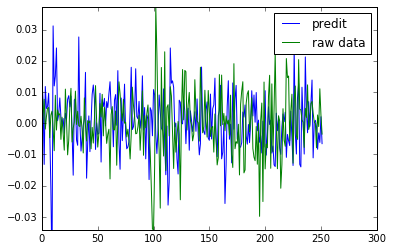

In [262]:
N = int(len(df_input) * 0.5)

input_train = df_input[:N]
target_train = df_target[:N]
input_pred = df_input[N:]
target_pred = df_target[N:]
n_in = len(input_train[0])
n_hidden = int(0.3 * n_in)
n_out = 1
n_layers=3
length = 20

lstm = GridLSTM(n_in, n_hidden, n_out, n_layers, is_initialize=True)


print ("start!")
st_s = time.time()
lstm.training(input_train, target_train,
                      learning_rate=1e-2, decay_freq=100, decay_rate=0.9,
                      length=length, n_epochs=10000)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = lstm.predict(input_pred)
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

start!
loss: 0.068092
learning rate: 0.01
loss: 2.11782e-11
learning rate: 0.003486784401
loss: 1.26591e-14
learning rate: 0.00121576654591
loss: 2.7127e-15
learning rate: 0.000423911582752
loss: 2.06542e-15
learning rate: 0.000147808829414
loss: 1.82149e-15
learning rate: 5.15377520732e-05
loss: 1.80904e-15
learning rate: 1.79701029991e-05
loss: 1.72755e-15
learning rate: 6.26578748218e-06
loss: 1.74754e-15
learning rate: 2.18474500528e-06
loss: 1.72692e-15
learning rate: 7.61773480459e-07
Model saved in file: /jupyter/tomoaki/model.ckpt
learning_time: 1354.06842399
Model restored.
loss: 0.000220997266131


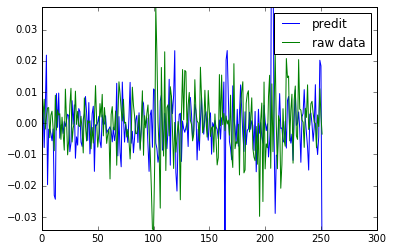

In [246]:
N = int(len(df_input) * 0.5)

input_train = df_input[:N]
target_train = df_target[:N]
input_pred = df_input[N:]
target_pred = df_target[N:]
n_in = len(input_train[0])
n_hidden = int(0.3 * n_in)
n_out = 1
n_layers=4
length = 20

lstm = GridLSTM(n_in, n_hidden, n_out, n_layers, is_initialize=True)


print ("start!")
st_s = time.time()
lstm.training(input_train, target_train,
                      learning_rate=1e-2, decay_freq=100, decay_rate=0.9,
                      length=length, n_epochs=10000)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = lstm.predict(input_pred)
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

start!
loss: 0.00173529
learning rate: 0.001
loss: 1.52888e-12
learning rate: 0.0003486784401
loss: 2.75003e-15
learning rate: 0.000121576654591
loss: 1.07005e-15
learning rate: 4.23911582752e-05
loss: 9.12948e-16
learning rate: 1.47808829414e-05
loss: 8.63566e-16
learning rate: 5.15377520732e-06
loss: 8.51024e-16
learning rate: 1.79701029991e-06
loss: 8.56729e-16
learning rate: 6.26578748218e-07
loss: 8.56281e-16
learning rate: 2.18474500528e-07
loss: 8.57688e-16
learning rate: 7.61773480459e-08
Model saved in file: /jupyter/tomoaki/model.ckpt
learning_time: 1355.40658307
Model restored.
loss: 0.00052600575669


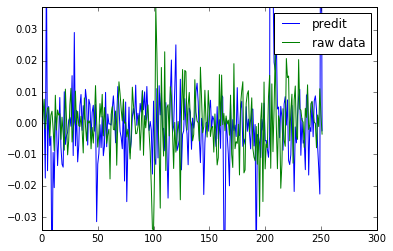

In [247]:
N = int(len(df_input) * 0.5)

input_train = df_input[:N]
target_train = df_target[:N]
input_pred = df_input[N:]
target_pred = df_target[N:]
n_in = len(input_train[0])
n_hidden = int(0.3 * n_in)
n_out = 1
n_layers=4
length = 20

lstm = GridLSTM(n_in, n_hidden, n_out, n_layers, is_initialize=True)


print ("start!")
st_s = time.time()
lstm.training(input_train, target_train,
                      learning_rate=1e-3, decay_freq=100, decay_rate=0.9,
                      length=length, n_epochs=10000)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = lstm.predict(input_pred)
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

start!
loss: 0.00199959
learning rate: 0.001
loss: 5.38084e-11
learning rate: 0.0003486784401
loss: 7.26384e-14
learning rate: 0.000121576654591
loss: 9.33195e-15
learning rate: 4.23911582752e-05
loss: 6.36683e-15
learning rate: 1.47808829414e-05
loss: 5.89863e-15
learning rate: 5.15377520732e-06
loss: 5.73618e-15
learning rate: 1.79701029991e-06
loss: 5.6878e-15
learning rate: 6.26578748218e-07
loss: 5.68418e-15
learning rate: 2.18474500528e-07
loss: 5.73032e-15
learning rate: 7.61773480459e-08
Model saved in file: /jupyter/tomoaki/model.ckpt
learning_time: 1003.94848204
Model restored.
loss: 0.000276338980775


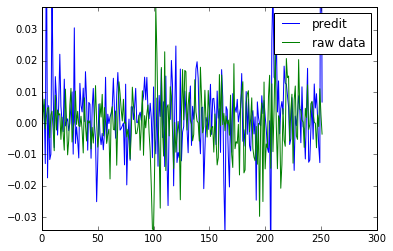

In [248]:
N = int(len(df_input) * 0.5)

input_train = df_input[:N]
target_train = df_target[:N]
input_pred = df_input[N:]
target_pred = df_target[N:]
n_in = len(input_train[0])
n_hidden = int(0.3 * n_in)
n_out = 1
n_layers=3
length = 20

lstm = GridLSTM(n_in, n_hidden, n_out, n_layers, is_initialize=True)


print ("start!")
st_s = time.time()
lstm.training(input_train, target_train,
                      learning_rate=1e-3, decay_freq=100, decay_rate=0.9,
                      length=length, n_epochs=10000)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = lstm.predict(input_pred)
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

In [249]:
class GridLSTM2(object):
    
    def __init__(self, n_in, n_hidden, n_out, n_layers, activation=tf.sigmoid, is_initialize=True):
        """Initialize Grid LSTM
        
        Args:
            n_in, n_hidden, n_out (int): the number of nodes of each layer
            n_layers (int): the number of hidden layers. 
                the shape of the network will be [n_in, n_hidden * n_layers, n_out]
            is_initialized(bool): if this variable is True, glaph will be initialized
        """
        self.n_in = n_in
        self.n_hidden = n_hidden
        self.n_out = n_out 
        self.n_layers = n_layers
        self.activation = activation
        
        if is_initialize is True:
            sess =tf.InteractiveSession()
            tf.reset_default_graph()
            sess.close()  
        
    def weight_variable(self, shape):
        initial = tf.truncated_normal(shape, stddev=1.0)
        return tf.Variable(initial, name="weight")
        
    def bias_variable(self, shape):
        initial = tf.constant(0.0, shape=shape)
        return tf.Variable(initial, name="bias")
        
    def build_model(self, n_data, length):
        # build model for trainig
        self._input = tf.placeholder(tf.float32, [n_data, self.n_in])
        self._target = tf.placeholder(tf.float32, [n_data, self.n_out])
        
        # when learning, we will split data which has shape (T, dim)
        # into (n_batch, dim) * (length)
        n_batch = int(n_data / length)
        input_split = tf.pack(tf.split(0, n_batch, self._input))
        input_tilde = []
        for i in xrange(length):
            input_tilde.append(input_split[:, i, :])
        
        x = input_tilde
        # build LSTM graph
        with tf.variable_scope("hidden"):
            cell = tf.contrib.grid_rnn.Grid2BasicLSTMCell(self.n_hidden)
            self._cell = tf.nn.rnn_cell.MultiRNNCell([cell] * self.n_layers)
            self._initial_state = self._cell.zero_state(n_batch, tf.float32)
            cell_outputs, state = tf.nn.rnn(
                cell=self._cell, 
                inputs=x, 
                initial_state=self._initial_state
            )
            self._final_state = state
            self.W = self.weight_variable([self.n_hidden, self.n_out])
            self.b = self.bias_variable([self.n_out])
            cell_outputs = tf.concat(0, cell_outputs)
            z = tf.matmul(cell_outputs, self.W) + self.b
            x = self.activation(z)
        
        # we will not apply activation function for the last layer
        self._output = z  
        
        # training graph
        self._learning_rate = tf.placeholder(tf.float32, shape=[], name="learning_rate")
        self.loss = tf.reduce_mean(tf.square(self._output - self._target))
        optimizer = tf.train.AdamOptimizer(learning_rate=self._learning_rate)
        self.train = optimizer.minimize(self.loss) 
        
    def build_pred_model(self, n_data):
        # build model for trainig
        self._input_pred = tf.placeholder(tf.float32, [n_data, self.n_in])
        input_tilde = tf.split(0, n_data, self._input_pred)
        # the name of variable scope will be layer0, layer1, ...
        x= input_tilde
        with tf.variable_scope("hidden", reuse=True):
            # build LSTM graph for prediction
            initial_state = self._cell.zero_state(1, tf.float32)
            cell_outputs, state = tf.nn.rnn(
                cell=self._cell, 
                inputs=x, 
                initial_state=initial_state
            )
            self._final_state = state
            cell_outputs = tf.concat(0, cell_outputs)
            z = tf.matmul(cell_outputs, self.W) + self.b
            x = self.activation(z)
      
        # we will not apply activation function for the last layer
        self._output_pred = z  
        
    
    def training(self, input_data, target_data, length=20, n_epochs=100,
                         learning_rate=1e-8, decay_rate=0.5, decay_freq=100):
        n_data = len(input_data)
        print_freq = int(n_epochs / 10)
        if print_freq == 0:
            print_freq = 1
        
        # build training graph
        n_batch = int(n_data / length)
        n_data_tilde = length * n_batch
        self.build_model(n_data_tilde, length)
        
        # we'll use only recent n_batch * n_split data 
        # because of garph's architechture
        input_data = input_data[n_data - n_data_tilde:]
        target_data = target_data[n_data - n_data_tilde:]
        
        # Add ops to save and restore all the variables.
        saver = tf.train.Saver()
        init_op = tf.initialize_all_variables()
        with tf.Session() as sess:
            sess.run(init_op)
            for epoch in xrange(n_epochs):
                # np.random.shuffle(batch_index)
                sess.run(self.train, 
                                feed_dict={self._input: input_data,
                                                     self._target: target_data,
                                                     self._learning_rate: learning_rate})
                if (epoch + 1) % decay_freq == 0:
                    learning_rate *= decay_rate
                    
                if epoch % print_freq == 0:
                    print ("loss:", 
                               self.loss.eval(session=sess, 
                                                      feed_dict={self._input: input_data,
                                                                           self._target: target_data}))     
                    print ("learning rate:", learning_rate)
            save_path = saver.save(sess, "/jupyter/tomoaki/model.ckpt")
            print("Model saved in file: %s" % save_path)
            
    def predict(self, input_data, length):
        n_data = len(input_data)
        self.build_pred_model(length)
        saver = tf.train.Saver()
        outputs = []
        with  tf.Session() as sess:
            # Restore variables from disk.
            saver.restore(sess, "/jupyter/tomoaki/model.ckpt")
            print("Model restored.")
            for i in xrange(n_data - length):
                beg = i
                end = i + length
                batch_input = input_data[beg:end]
                output = self._output_pred.eval(session=sess,
                                                                         feed_dict={self._input_pred: batch_input})
                outputs.append(output[-1])
        return outputs

start!
loss: 0.0016996
learning rate: 0.001
loss: 1.8654e-10
learning rate: 0.0003486784401
loss: 5.6388e-13
learning rate: 0.000121576654591
loss: 4.21778e-14
learning rate: 4.23911582752e-05
loss: 2.34428e-14
learning rate: 1.47808829414e-05
loss: 2.06322e-14
learning rate: 5.15377520732e-06
loss: 2.01301e-14
learning rate: 1.79701029991e-06
loss: 2.00721e-14
learning rate: 6.26578748218e-07
loss: 1.99923e-14
learning rate: 2.18474500528e-07
loss: 1.99897e-14
learning rate: 7.61773480459e-08
Model saved in file: /jupyter/tomoaki/model.ckpt
learning_time: 1004.80161309
Model restored.
loss: 0.000540155534523


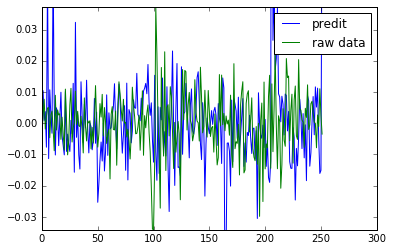

In [250]:
N = int(len(df_input) * 0.5)

input_train = df_input[:N]
target_train = df_target[:N]
input_pred = df_input[N - length:]
target_pred = df_target[N:]
n_in = len(input_train[0])
n_hidden = int(0.3 * n_in)
n_out = 1
n_layers=3
length = 20

lstm = GridLSTM2(n_in, n_hidden, n_out, n_layers, is_initialize=True)


print ("start!")
st_s = time.time()
lstm.training(input_train, target_train,
                      learning_rate=1e-3, decay_freq=100, decay_rate=0.9,
                      length=length, n_epochs=10000)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = lstm.predict(input_pred, length)
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

In [251]:
print ("loss:", np.mean(np.square(target_pred)))

loss: 9.51840798908e-05


# chnage the way to learn

In [ ]:
class GridLSTM3(object):
    
    def __init__(self, n_in, n_hidden, n_out, n_layers, activation=tf.sigmoid, is_initialize=True):
        """Initialize Grid LSTM
        
        Args:
            n_in, n_hidden, n_out (int): the number of nodes of each layer
            n_layers (int): the number of hidden layers. 
                the shape of the network will be [n_in, n_hidden * n_layers, n_out]
            is_initialized(bool): if this variable is True, glaph will be initialized
        """
        self.n_in = n_in
        self.n_hidden = n_hidden
        self.n_out = n_out 
        self.n_layers = n_layers
        self.activation = activation
        
        if is_initialize is True:
            sess =tf.InteractiveSession()
            tf.reset_default_graph()
            sess.close()  
        
    def weight_variable(self, shape):
        initial = tf.truncated_normal(shape, stddev=1.0)
        return tf.Variable(initial, name="weight")
        
    def bias_variable(self, shape):
        initial = tf.constant(0.0, shape=shape)
        return tf.Variable(initial, name="bias")
        
    def build_model(self, n_batch, length, length):
        # make train data whose size is n_batch * batch_size
        n_data = n_batch * length
        
        # build model for trainig
        self._input = tf.placeholder(tf.float32, [n_batch, length, self.n_in])
        self._target = tf.placeholder(tf.float32, [n_batch, length, self.n_out])
        
        # when learning, we will split data which has shape (T, dim)
        # into (n_batch, dim) * (length)
        input_batch = tf.pack(self._input)
        input_tilde = []
        for i in xrange(length):
            input_tilde.append(input_split[:, i, :])
         
        # reshape for training
        target_tilde = []
        for i in xrange(length):
            target_tilde.append(self._target_data[:, i, :])
        target_tilde = tf.concat(0, target_tilde)
        
        x = input_tilde
        # build LSTM graph
        with tf.variable_scope("hidden"):
            cell = tf.contrib.grid_rnn.Grid2BasicLSTMCell(self.n_hidden)
            self._cell = tf.nn.rnn_cell.MultiRNNCell([cell] * self.n_layers)
            self._initial_state = self._cell.zero_state(n_batch, tf.float32)
            cell_outputs, state = tf.nn.rnn(
                cell=self._cell, 
                inputs=x, 
                initial_state=self._initial_state
            )
            self._final_state = state
            self.W = self.weight_variable([self.n_hidden, self.n_out])
            self.b = self.bias_variable([self.n_out])
            cell_outputs = tf.concat(0, cell_outputs)
            z = tf.matmul(cell_outputs, self.W) + self.b
            x = self.activation(z)
        
        # we will not apply activation function for the last layer
        self._output = z  
        
        # training graph
        self._learning_rate = tf.placeholder(tf.float32, shape=[], name="learning_rate")
        self.loss = tf.reduce_mean(tf.square(self._output - target_tilde))
        optimizer = tf.train.AdamOptimizer(learning_rate=self._learning_rate)
        self.train = optimizer.minimize(self.loss) 
        
    def build_pred_model(self, n_data):
        # build model for trainig
        self._input_pred = tf.placeholder(tf.float32, [n_data, self.n_in])
        input_tilde = tf.split(0, n_data, self._input_pred)
        # the name of variable scope will be layer0, layer1, ...
        x= input_tilde
        with tf.variable_scope("hidden", reuse=True):
            # build LSTM graph for prediction
            initial_state = self._cell.zero_state(1, tf.float32)
            cell_outputs, state = tf.nn.rnn(
                cell=self._cell, 
                inputs=x, 
                initial_state=initial_state
            )
            self._final_state = state
            cell_outputs = tf.concat(0, cell_outputs)
            z = tf.matmul(cell_outputs, self.W) + self.b
            x = self.activation(z)
      
        # we will not apply activation function for the last layer
        self._output_pred = z  
        
    
    def training(self, input_data, target_data, n_batch=10, length=20, n_epochs=100,
                         learning_rate=1e-8, decay_rate=0.5, decay_freq=100):
        n_data = len(input_data)
        print_freq = int(n_epochs / 10)
        if print_freq == 0:
            print_freq = 1
        
        # build training graph
        n_batch = int(n_data / length)
        n_data_tilde = length * n_batch
        self.build_model(n_data_tilde, length)
        
        # we'll use only recent n_batch * n_split data 
        # because of garph's architechture
        input_data = input_data[n_data - n_data_tilde:]
        target_data = target_data[n_data - n_data_tilde:]
        
        # Add ops to save and restore all the variables.
        saver = tf.train.Saver()
        init_op = tf.initialize_all_variables()
        with tf.Session() as sess:
            sess.run(init_op)
            for epoch in xrange(n_epochs):
                # choose trainig data stochastically
                indices = np.random.int(0, n_data - length, n_batch)
                input_list = []
                target_list = []
                for idx in indices:
                    input_list.append(input_data[idx:idx + length])
                    target_list.append(target_data[idx:idx + length])
                    
                sess.run(self.train, 
                                feed_dict={self._input: input_data,
                                                     self._target: target_data,
                                                     self._learning_rate: learning_rate})
                if (epoch + 1) % decay_freq == 0:
                    learning_rate *= decay_rate
                    
                if epoch % print_freq == 0:
                    print ("loss:", 
                               self.loss.eval(session=sess, 
                                                      feed_dict={self._input: input_data,
                                                                           self._target: target_data}))     
                    print ("learning rate:", learning_rate)
            save_path = saver.save(sess, "/jupyter/tomoaki/model.ckpt")
            print("Model saved in file: %s" % save_path)
            
    def predict(self, input_data):
        n_data = len(input_data)
        self.build_pred_model(n_data)
        saver = tf.train.Saver()
        with  tf.Session() as sess:
            # Restore variables from disk.
            saver.restore(sess, "/jupyter/tomoaki/model.ckpt")
            print("Model restored.")
            output = self._output_pred.eval(session=sess,
                                                           feed_dict={self._input_pred: input_data})
        return output 

In [ ]:
N = int(len(df_input) * 0.5)

input_train = df_input[:N]
target_train = df_target[:N]
input_pred = df_input[N:]
target_pred = df_target[N:]
n_in = len(input_train[0])
n_hidden = int(0.3 * n_in)
n_out = 1
n_layers=4
length = 20

lstm = GridLSTM(n_in, n_hidden, n_out, n_layers, is_initialize=True)


print ("start!")
st_s = time.time()
lstm.training(input_train, target_train,
                      learning_rate=1e-3, decay_freq=100, decay_rate=0.9,
                      length=length, n_epochs=10000)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = lstm.predict(input_pred)
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

# change the shape of data

In [183]:
df_input = np.log(input_data[1:] / input_data[:-1])
df_target = np.log(target_data[1:] / target_data[:-1])

start!
loss: 30.8935
learning rate: 0.1
loss: 7.57807e-06
learning rate: 0.03486784401
loss: 1.70942e-06
learning rate: 0.0121576654591
loss: 7.71937e-07
learning rate: 0.00423911582752
loss: 4.96512e-07
learning rate: 0.00147808829414
loss: 3.87503e-07
learning rate: 0.000515377520732
loss: 3.36805e-07
learning rate: 0.000179701029991
loss: 3.11119e-07
learning rate: 6.26578748218e-05
loss: 2.97519e-07
learning rate: 2.18474500528e-05
loss: 2.90161e-07
learning rate: 7.61773480459e-06
Model saved in file: /jupyter/tomoaki/model.ckpt
learning_time: 135.84649992
Model restored.


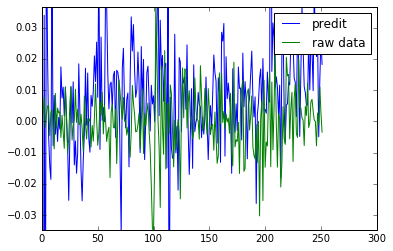

In [185]:
N = int(len(df_input) * 0.5)

input_train = df_input[:N]
target_train = df_target[:N]
input_pred = df_input[N:]
target_pred = df_target[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.3 * n_in)
n_out = 1
n_batch=20

lstm = VanillaLSTM(layers=[n_in, n_hidden1, n_out], is_initialize=True)


print ("start!")
st_s = time.time()
lstm.training(input_train, target_train,
                      learning_rate=0.1, decay_freq=100, decay_rate=0.9,
                      n_batch=n_batch, n_epochs=10000)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = lstm.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

start!
loss: 1.33011
learning rate:  0.1
loss: 5.19281e-05
learning rate:  0.03486784401
loss: 4.79018e-05
learning rate:  0.0121576654591
loss: 4.78703e-05
learning rate:  0.00423911582752
loss: 4.7857e-05
learning rate:  0.00147808829414
loss: 4.78506e-05
learning rate:  0.000515377520732
loss: 4.78473e-05
learning rate:  0.000179701029991
loss: 4.78455e-05
learning rate:  6.26578748218e-05
loss: 4.78446e-05
learning rate:  2.18474500528e-05
loss: 4.78441e-05
learning rate:  7.61773480459e-06
Model saved in file: /jupyter/tomoaki/model.ckpt
learning_time: 894.119130135
Model restored.


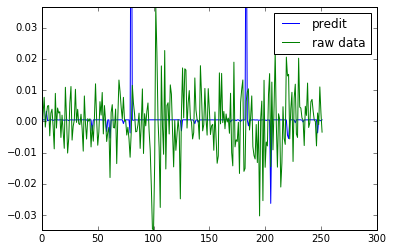

In [186]:
N = int(len(df_input) * 0.5)

input_train = df_input[:N]
target_train = df_target[:N]
input_pred = df_input[N:]
target_pred = df_target[N:]
n_in = len(input_train[0])
n_hidden = int(0.3 * n_in)
n_out = 1
n_layers=3
n_batch=20

lstm = GridLSTM(n_in, n_hidden, n_out, n_layers, is_initialize=True)


print ("start!")
st_s = time.time()
lstm.training(input_train, target_train,
                      learning_rate=0.1, decay_freq=100, decay_rate=0.9,
                      n_batch=n_batch, n_epochs=10000)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = lstm.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

# introduce normalization for input

In [187]:
df_input = input_data[1:] / input_data[:-1] - 1.0
df_target = target_data[1:] / target_data[:-1] -1.0

In [231]:
class VanillaLSTM3(object):
    
    def __init__(self, layers, activation=tf.sigmoid, is_initialize=True):
        """Initialize Vanilla LSTM
        
        Args:
            layers (List(int)): each element should be the number of components
            is_initialized(bool): if this variable is True, glaph will be initialized
        """
        self.layers = layers
        self.activation = activation
        
        if is_initialize is True:
            sess =tf.InteractiveSession()
            tf.reset_default_graph()
            sess.close()  
        
    def weight_variable(self, shape):
        initial = tf.truncated_normal(shape, stddev=1.0)
        return tf.Variable(initial, name="weight")
        
    def bias_variable(self, shape):
        initial = tf.constant(0.0, shape=shape)
        return tf.Variable(initial, name="bias")
    
    def batch_normalization(self, input, shape, gamma=None, beta=None):
        # input should be hidden_dim
        eps = 1e-5
        if gamma is None:
            gamma = tf.Variable(tf.constant(1.0, shape=shape))
        if beta is None:
            beta = tf.Variable(tf.constant(0.0, shape=shape))
        mean, variance = tf.nn.moments(input, [0])
        return gamma * (input - mean) / tf.sqrt(variance + eps) + beta
        
    def build_model(self, n_data, length):
        # build model for trainig
        self._input = tf.placeholder(tf.float32, [n_data, self.layers[0]])
        self._target = tf.placeholder(tf.float32, [n_data, self.layers[-1]])
        
        # when learning, we will split data which has shape (T, dim)
        # into (n_batch, dim) * (length)
        n_batch = int(n_data / length)
        input_split = tf.pack(tf.split(0, n_batch, self._input))
        input_tilde = []
        for i in xrange(length):
            input_tilde.append(input_split[:, i, :])
        
        # batch normalization
        normalized_input = []
        self.gamma = tf.Variable(tf.constant(1.0, shape=[self.layers[0]]))
        self.beta = tf.Variable(tf.constant(0.0, shape=[self.layers[0]]))
        for ipt in input_tilde:
            normalized_ipt = self.batch_normalization(ipt, [self.layers[0]], gamma=self.gamma, beta=self.beta)
            normalized_input.append(ipt)
        
        # the name of variable scope will be layer0, layer1, ...
        x = normalized_input
        with tf.variable_scope("hidden"):
            # build LSTM graph for each layer
            self._cell = tf.nn.rnn_cell.BasicLSTMCell(self.layers[1])
            self._initial_state = self._cell.zero_state(n_batch, tf.float32)
            cell_outputs, state = tf.nn.rnn(
                cell=self._cell, 
                inputs=x, 
                initial_state=self._initial_state
            )
            self._final_state = state
            n_in = self.layers[1]
            n_out = self.layers[2]
            self.W = self.weight_variable([n_in, n_out])
            self.b = self.bias_variable([n_out])
            cell_outputs = tf.concat(0, cell_outputs)
            z = tf.matmul(cell_outputs, self.W) + self.b
            x = self.activation(z)
        
        # we will not apply activation function for the last layer
        self._output = z  
        
        # training graph
        self._learning_rate = tf.placeholder(tf.float32, shape=[], name="learning_rate")
        self.loss = tf.reduce_mean(tf.square(self._output - self._target))
        optimizer = tf.train.AdamOptimizer(learning_rate=self._learning_rate)
        self.train = optimizer.minimize(self.loss) 
        
    def build_pred_model(self, n_data):
        # build model for trainig
        self._input_pred = tf.placeholder(tf.float32, [n_data, self.layers[0]])
        normalized_input = self.batch_normalization(self._input_pred, shape=[self.layers[0]], 
                                                                                       gamma=self.gamma, beta=self.beta)
        input_tilde = tf.split(0, n_data, normalized_input)
        # the name of variable scope will be layer0, layer1, ...
        x= input_tilde
        with tf.variable_scope("hidden", reuse=True):
            # build LSTM graph for prediction
            initial_state = self._cell.zero_state(1, tf.float32)
            cell_outputs, state = tf.nn.rnn(
                cell=self._cell, 
                inputs=x, 
                initial_state=initial_state
            )
            self._final_state = state
            n_in = self.layers[1]
            n_out = self.layers[2]
            cell_outputs = tf.concat(0, cell_outputs)
            z = tf.matmul(cell_outputs, self.W) + self.b
            x = self.activation(z)
      
        # we will not apply activation function for the last layer
        self._output_pred = z  
        
    
    def training(self, input_data, target_data, length=20, n_epochs=100,
                         learning_rate=1e-8, decay_rate=0.5, decay_freq=100):
        n_data = len(input_data)
        print_freq = int(n_epochs / 10)
        if print_freq == 0:
            print_freq = 1
        
        # build training graph
        n_batch = int(n_data / length)
        n_data_tilde = length * n_batch
        self.build_model(n_data_tilde, length)
        
        # we'll use only recent n_batch * n_split data 
        # because of garph's architechture
        input_data = input_data[n_data - n_data_tilde:]
        target_data = target_data[n_data - n_data_tilde:]
        
        # Add ops to save and restore all the variables.
        saver = tf.train.Saver()
        init_op = tf.initialize_all_variables()
        with tf.Session() as sess:
            sess.run(init_op)
            for epoch in xrange(n_epochs):
                # np.random.shuffle(batch_index)
                sess.run(self.train, 
                                feed_dict={self._input: input_data,
                                                     self._target: target_data,
                                                     self._learning_rate: learning_rate})
                if (epoch + 1) % decay_freq == 0:
                    learning_rate *= decay_rate
                    
                if epoch % print_freq == 0:
                    print ("loss:", 
                               self.loss.eval(session=sess, 
                                                      feed_dict={self._input: input_data,
                                                                           self._target: target_data}))     
                    print ("learning rate:", learning_rate)
            save_path = saver.save(sess, "/jupyter/tomoaki/model.ckpt")
            print("Model saved in file: %s" % save_path)
            
    def predict(self, input_data):
        n_data = len(input_data)
        self.build_pred_model(n_data)
        saver = tf.train.Saver()
        with  tf.Session() as sess:
            # Restore variables from disk.
            saver.restore(sess, "/jupyter/tomoaki/model.ckpt")
            print("Model restored.")
            output = self._output_pred.eval(session=sess,
                                                           feed_dict={self._input_pred: input_data})
        return output    

start!


loss: 0.614351
learning rate: 0.01
loss: 0.0408684
learning rate: 0.01
loss: 0.00517408
learning rate: 0.01
loss: 0.00270467
learning rate: 0.01
loss: 0.00101681
learning rate: 0.01
loss: 0.000499579
learning rate: 0.01
loss: 0.00022092
learning rate: 0.01
loss: 0.000155675
learning rate: 0.01
loss: 9.65729e-05
learning rate: 0.01
loss: 7.20847e-05
learning rate: 0.01
Model saved in file: /jupyter/tomoaki/model.ckpt
learning_time: 7.65493893623
Model restored.
loss: 4.02031891779


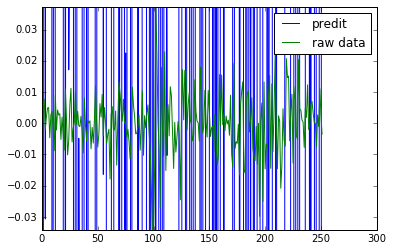

In [236]:
N = int(len(df_input) * 0.5)

length=20
input_train = df_input[:N]
target_train = df_target[:N]
input_pred = df_input[N:]
target_pred = df_target[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.3 * n_in)
n_out = 1


lstm = VanillaLSTM3(layers=[n_in, n_hidden1, n_out], is_initialize=True)


print ("start!")
st_s = time.time()
lstm.training(input_train, target_train,
                      learning_rate=1e-2, decay_freq=100, decay_rate=0.9,
                      length=length, n_epochs=100)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = lstm.predict(input_pred)
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

start!


loss: 1.12997
learning rate: 0.01
loss: 3.48423e-08
learning rate: 0.003486784401
loss: 1.7591e-10
learning rate: 0.00121576654591
loss: 9.34292e-12
learning rate: 0.000423911582752
loss: 2.77565e-12
learning rate: 0.000147808829414
loss: 1.87334e-12
learning rate: 5.15377520732e-05
loss: 1.65592e-12
learning rate: 1.79701029991e-05
loss: 1.59537e-12
learning rate: 6.26578748218e-06
loss: 1.57415e-12
learning rate: 2.18474500528e-06
loss: 1.56881e-12
learning rate: 7.61773480459e-07
Model saved in file: /jupyter/tomoaki/model.ckpt
learning_time: 209.634217978
Model restored.
loss: 8.88210714582


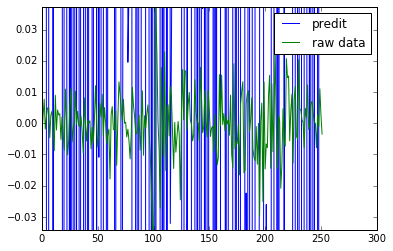

In [238]:
N = int(len(df_input) * 0.5)

length=20
input_train = df_input[:N]
target_train = df_target[:N]
input_pred = df_input[N:]
target_pred = df_target[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.3 * n_in)
n_out = 1


lstm = VanillaLSTM3(layers=[n_in, n_hidden1, n_out], is_initialize=True)


print ("start!")
st_s = time.time()
lstm.training(input_train, target_train,
                      learning_rate=1e-2, decay_freq=100, decay_rate=0.9,
                      length=length, n_epochs=10000)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = lstm.predict(input_pred)
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

In [15]:
class VanillaLSTM(object):
    def __init__(self, N_in, N_hidden, N_out, N_memory=100,
                 learning_rate=1e-4, is_initialized=False):
        self.N_in = N_in
        self.N_hidden = N_hidden
        self.N_out = N_out
        self.N_memory = N_memory
        
        if is_initialized:
            sess = tf.InteractiveSession()
            tf.reset_default_graph() # reset the graph under sess
            sess.close()
        
        self._input = tf.placeholder(tf.float32, [N_memory, N_in])
        self._target = tf.placeholder(tf.float32, [N_memory, N_out])
        # Build Model
        # self.W_in = self.weight_variable([N_in, N_hidden])
        # self.b_in = self.bias_variable([N_hidden])
        self.W_out = self.weight_variable([N_hidden, N_out])
        self.b_out = self.bias_variable([N_out])
        # reshape for batch computation
        # zs = tf.matmul(self._input, self.W_in) + self.b_in
        # this is for input of tf.rnn.rnn
        # zs_tilde = [tf.reshape(zs[i, :], [1, N_hidden]) for i in xrange(N_memory)]
        input_tilde = [tf.reshape(self._input[i, :], [1, N_in]) for i in xrange(N_memory)]
        
        # build LSTM graph
        self.cell = cell = tf.nn.rnn_cell.BasicLSTMCell(N_hidden)
        self._initial_state = cell.zero_state(1, tf.float32)
        state = self._initial_state
        self.name = "LSTM%s" % time.time()
        with tf.variable_scope(self.name):
            cell_outputs, state = tf.nn.rnn(cell=self.cell, inputs=input_tilde, initial_state=state)
            # cell_outputs, state = tf.nn.rnn(cell=self.cell, inputs=input_tilde)
            self._final_state = state
        # get the sahpe back to N_memory * N_hidden
        cell_outputs = tf.pack(cell_outputs)
        pre_outputs = tf.squeeze(cell_outputs)
        self.outputs = tf.matmul(pre_outputs, self.W_out) + self.b_out
        # training    
        self.loss = tf.reduce_sum(tf.square(self.outputs - self._target))
        optimizer = tf.train.AdamOptimizer(learning_rate)
        self.train = optimizer.minimize(self.loss)
        
    def weight_variable(self, shape):
        initial = tf.truncated_normal(shape, stddev=0.1)
        return tf.Variable(initial)

    def bias_variable(self, shape):
        initial = tf.constant(0.0, shape=shape)
        return tf.Variable(initial)

    def online_predict(self, input_data, target_data, N_epochs=1000):
        df_input = np.log(input_data[1:] / input_data[:-1])
        df_target = np.log(target_data[1:] / target_data[:-1])
        # additional input for prediction
        # pred_input = tf.placeholder(tf.float32, [1, N_in])
        # pred_out, state = self.cell(inputs=pred_input, state=self._final_state)
        # pred_rate = tf.exp(tf.matmul(pred_out, self.W_out) + self.b_out)
        N_data = len(df_input)
        print_freq = int(N_data / 10)
        outputs_list = []
        with tf.Session() as sess:
            tf.initialize_all_variables().run()
            for end in xrange(self.N_memory, N_data):
                beg = end - self.N_memory
                train_x = df_input[beg: end]
                pred_x = df_input[beg + 1: end + 1]
                train_y = df_target[beg: end]
                for i in xrange(N_epochs):
                    sess.run(self.train, feed_dict={self._input: train_x, self._target: train_y})
                    # if i%10 == 0:
                    #    print ("loss = %e" % self.loss.eval(session=sess, feed_dict={self._input: train_x, self._target: train_y}))
                if (end + 1) % print_freq == 0:
                    print ("predict %d, loss = %e" % (end, self.loss.eval(session=sess, feed_dict={self._input: train_x, self._target: train_y})))
                # rate = pred_rate.eval(session=sess, feed_dict={self._input: train_x, pred_input: pred_x})[0]
                rate = np.exp(self.outputs[self.N_memory - 1, 0].eval(session=sess, feed_dict={self._input: pred_x}))
                outputs_list.append(target_data[end][0] * rate)
        return outputs_list

In [ ]:
import time

# input_data_mini = input_data[:130]
# target_data_mini=target_data[:130]
N_memory = 50
N_in = len(input_data[0])
N_hidden = int(0.2 * N_in)
N_out = 1
N_layer = 3


lstm = VanillaLSTM(N_in, N_hidden, N_out, N_memory, learning_rate=1e-3, is_initialized=True)
st_s = time.time()
prediction = lstm.online_predict(input_data, target_data, N_epochs=100)
elapsed_s = time.time() - st_s
print ("the time of computation:", elapsed_s)

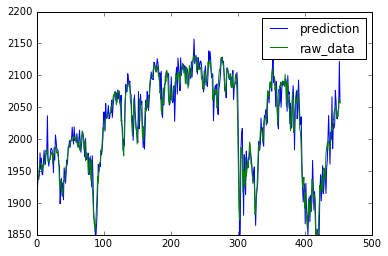

In [369]:
N_pred = len(prediction)
plt.plot(prediction, label="prediction")
plt.plot(target_data[-N_pred:], label="raw_data")
plt.ylim(1850, 2200)
plt.legend()

# Grid LSTM

In [34]:
class GridLSTM(object):
    def __init__(self, num_in, num_hidden, num_out, num_memory,
                 num_layer, learning_rate=1e-2, is_initialized=False):
        # Network Architechture
        self.num_in = num_in
        self.num_hidden = num_hidden
        self.num_out = num_out
        self.num_memory = num_memory
        self.num_layer = num_layer
        
        #delete graph you've made before
        if is_initialized:
            sess = tf.InteractiveSession()
            tf.reset_default_graph()
            sess.close()
        
        # Build Model
        self._input = tf.placeholder(tf.float32, [num_memory, num_in])
        self._target = tf.placeholder(tf.float32, [num_memory, num_out])
        self.W_out = self.weight_variable([N_hidden, N_out])
        self.b_out = self.bias_variable([N_out])
        
        # reshape input into [tf.Variable([batch=1 , 1]) * num_hidden] * num_memory
        _input_tilde = [tf.reshape(self._input[t, :], [1, num_in]) for t in xrange(num_memory)]
        
        # Build LSTM Graph
        cell = tf.contrib.grid_rnn.Grid2BasicLSTMCell(num_hidden)
        self._cell = tf.nn.rnn_cell.MultiRNNCell([cell] * num_layer)
        self._initial_state = self._cell.zero_state(1, tf.float32)
        state = self._initial_state
        with tf.variable_scope("LSTM"):
            cell_outputs, state = tf.nn.rnn(cell=self._cell, inputs=_input_tilde, initial_state=state)
            self._final_state = state

        # get the sahpe back to N_memory * N_hidden
        cell_outputs = tf.pack(cell_outputs)
        pre_outputs = tf.squeeze(cell_outputs)
        self.outputs = tf.matmul(pre_outputs, self.W_out) + self.b_out

        # training    
        self.loss = tf.reduce_mean(tf.square(self.outputs - self._target))
        optimizer = tf.train.AdamOptimizer(learning_rate)
        self.train = optimizer.minimize(self.loss)
        
    def weight_variable(self, shape):
        initial = tf.truncated_normal(shape, stddev=0.1)
        return tf.Variable(initial)

    def bias_variable(self, shape):
        initial = tf.constant(0.0, shape=shape)
        return tf.Variable(initial)

    def online_predict(self, input_data, target_data, num_epochs=1000):
        df_input = np.log(input_data[1:] / input_data[:-1])
        df_target = np.log(target_data[1:] / target_data[:-1])
        num_data = len(df_input)
        print_freq = int(num_epochs / 10)
        outputs_list = []
        with tf.Session() as sess:
            tf.initialize_all_variables().run()
            for end in xrange(self.num_memory, num_data):
                beg = end - self.num_memory
                train_x = df_input[beg: end]
                pred_x = df_input[beg + 1: end + 1]
                train_y = df_target[beg: end]
                for i in xrange(num_epochs):
                    sess.run(self.train, feed_dict={self._input: train_x, self._target: train_y})
                print ("predict %d" % (end + 1))
                rate = np.exp(self.outputs[self.num_memory - 1, 0].eval(session=sess, feed_dict={self._input: pred_x}))
                outputs_list.append(target_data[end + 1][0] * rate)
        
        return outputs_list  

In [35]:
input_data_mini = input_data[:100]
target_data_mini=target_data[:100]
N_memory = 50
N_in = len(input_data[0])
N_hidden = int(0.5 * N_in)
N_out = 1
N_layer = 3


lstm = GridLSTM(N_in, N_hidden, N_out, N_memory, N_layer, learning_rate=1e-3, is_initialized=True)

print ("start!")
st_s = time.time()
prediction = lstm.online_predict(input_data_mini, target_data_mini, num_epochs=100)
elapsed_s = time.time - st_s
print ("learning_time:",  elapsed_s)

N_pred = len(prediction)
plt.plot(prediction, label="prediction")
plt.plot(target_data_mini[-N_pred:], label="raw_data")
plt.ylim(1850, 2200)
plt.legend()

start!
predict 51
predict 52
predict 53
predict 54
predict 55
predict 56
predict 57
predict 58
predict 59
predict 60
predict 61
predict 62
predict 63
predict 64
predict 65
predict 66
predict 67
predict 68
predict 69
predict 70
predict 71
predict 72
predict 73
predict 74
predict 75
predict 76
predict 77
predict 78
predict 79
predict 80
predict 81
predict 82
predict 83
predict 84
predict 85
predict 86
predict 87
predict 88
predict 89
predict 90
predict 91
predict 92
predict 93
predict 94
predict 95
predict 96
predict 97
predict 98
predict 99


TypeError: unsupported operand type(s) for -: 'builtin_function_or_method' and 'float'

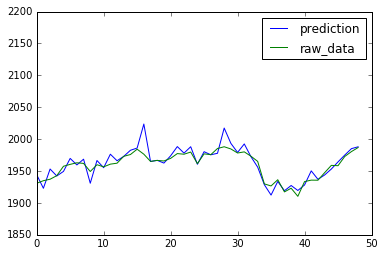

In [36]:
N_pred = len(prediction)
plt.plot(prediction, label="prediction")
plt.plot(target_data_mini[-N_pred:], label="raw_data")
plt.ylim(1850, 2200)
plt.legend()

# Compare performance with GridLSTM and Vanilla LSTM

## Vanilla LSTM

In [111]:
class VanillaLSTM2(object):
    def __init__(self, N_in, N_hidden, N_out, N_memory=100,
                 learning_rate=None, is_initialized=False):
        self.N_in = N_in
        self.N_hidden = N_hidden
        self.N_out = N_out
        self.N_memory = N_memory
        
        if is_initialized:
            sess = tf.InteractiveSession()
            tf.reset_default_graph() # reset the graph under sess
            sess.close()
        
        self._input = tf.placeholder(tf.float32, [N_memory, N_in])
        self._target = tf.placeholder(tf.float32, [N_memory, N_out])
        # Build Model
        self.W_out = self.weight_variable([N_hidden, N_out])
        self.b_out = self.bias_variable([N_out])
        # reshape for batch computation
        input_tilde = [tf.reshape(self._input[i, :], [1, N_in]) for i in xrange(N_memory)]
        
        # build LSTM graph
        with tf.variable_scope("LSTM"):
            self.cell = cell = tf.nn.rnn_cell.BasicLSTMCell(N_hidden)
            self._initial_state = cell.zero_state(1, tf.float32)
            state = self._initial_state
            cell_outputs, state = tf.nn.rnn(cell=self.cell, inputs=input_tilde, initial_state=state)
            self._final_state = state
        # get the sahpe back to N_memory * N_hidden
        cell_outputs = tf.pack(cell_outputs)
        pre_outputs = tf.squeeze(cell_outputs, [1])
        self.outputs = tf.matmul(pre_outputs, self.W_out) + self.b_out
        # training    
        self.loss = tf.reduce_sum(tf.square(self.outputs - self._target))
        if learning_rate is None:
            optimizer = tf.train.AdamOptimizer()
        else:
            optimizer = tf.train.AdamOptimizer(learning_rate)
        self.train = optimizer.minimize(self.loss)
        
    def weight_variable(self, shape):
        initial = tf.truncated_normal(shape, stddev=0.1)
        return tf.Variable(initial)

    def bias_variable(self, shape):
        initial = tf.constant(0.0, shape=shape)
        return tf.Variable(initial)

    def online_predict(self, input_data, target_data, predict_length=1, N_epochs=1000):
        df_input = np.log(input_data[1:] / input_data[:-1])
        df_target = np.log(target_data[1:] / target_data[:-1])
        with tf.variable_scope("LSTM", reuse=True):
            # additional input for prediction
            pred_input = tf.placeholder(tf.float32, [predict_length, N_in])
            pred_input_tilde = [tf.reshape(pred_input[t, :], [1, N_in]) for t in xrange(predict_length)]
            cell_outputs, state = tf.nn.rnn(cell=self.cell, inputs=pred_input_tilde, initial_state=self._final_state)
            # get the sahpe back to predict_length * N_hidden
            cell_outputs = tf.pack(cell_outputs)
            pre_outputs = tf.squeeze(cell_outputs, [1])
            outputs = tf.matmul(pre_outputs, self.W_out) + self.b_out
        N_data = len(df_input)
        outputs_list = []
        init_op = tf.initialize_all_variables()
        with tf.Session() as sess:
            sess.run(init_op)
            for end in xrange(self.N_memory, N_data + predict_length, predict_length):
                beg = end - self.N_memory
                train_x = df_input[beg: end]
                if end + predict_length > N_data:
                    continue
                else:    
                    pred_x = df_input[end: end + predict_length]
                train_y = df_target[beg: end]
                for i in xrange(N_epochs):
                    sess.run(self.train, feed_dict={self._input: train_x, self._target: train_y})
                    # if i%10 == 0:
                    #    print ("loss = %e" % self.loss.eval(session=sess, feed_dict={self._input: train_x, self._target: train_y}))
                print ("predict [%d, %d]" % (end, end + predict_length - 1))
                rate = np.exp(outputs[:, 0].eval(session=sess, feed_dict={self._input: train_x, pred_input: pred_x}))
                outputs_list += list(target_data[end][0] * np.cumprod(rate))
        return outputs_list

start!
predict [50, 59]
predict [60, 69]
predict [70, 79]
predict [80, 89]
predict [90, 99]
predict [100, 109]
predict [110, 119]
predict [120, 129]
predict [130, 139]
predict [140, 149]
predict [150, 159]
predict [160, 169]
predict [170, 179]
predict [180, 189]
predict [190, 199]
predict [200, 209]
predict [210, 219]
predict [220, 229]
predict [230, 239]
predict [240, 249]
predict [250, 259]
predict [260, 269]
predict [270, 279]
predict [280, 289]
predict [290, 299]
predict [300, 309]
predict [310, 319]
predict [320, 329]
predict [330, 339]
predict [340, 349]
predict [350, 359]
predict [360, 369]
predict [370, 379]
predict [380, 389]
predict [390, 399]
predict [400, 409]
predict [410, 419]
predict [420, 429]
predict [430, 439]
predict [440, 449]
predict [450, 459]
predict [460, 469]
predict [470, 479]
predict [480, 489]
predict [490, 499]
learning_time: 18.875701189


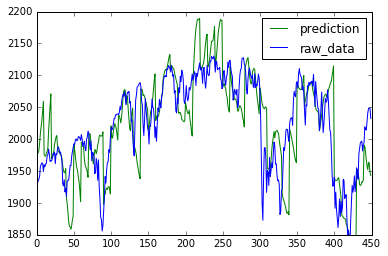

In [114]:
input_data_mini = input_data[:]
target_data_mini=target_data[:]
N_memory = 50
N_in = len(input_data[0])
N_hidden = int(0.2 * N_in)
N_out = 1
N_layer = 3


lstm = VanillaLSTM2(N_in, N_hidden, N_out, N_memory, is_initialized=True)

print ("start!")
st_s = time.time()
prediction = lstm.online_predict(input_data_mini, target_data_mini, 
                                 predict_length=10, N_epochs=1)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

N_pred = len(prediction)
plt.plot(prediction, label="prediction", c='g')
num_data = len(prediction)
plt.plot(target_data_mini[N_memory:N_memory + num_data], label="raw_data", c='b')
plt.ylim(1850, 2200)
plt.legend()

start!
predict [50, 59]
predict [60, 69]
predict [70, 79]
predict [80, 89]
predict [90, 99]
predict [100, 109]
predict [110, 119]
predict [120, 129]
predict [130, 139]
predict [140, 149]
predict [150, 159]
predict [160, 169]
predict [170, 179]
predict [180, 189]
predict [190, 199]
predict [200, 209]
predict [210, 219]
predict [220, 229]
predict [230, 239]
predict [240, 249]
predict [250, 259]
predict [260, 269]
predict [270, 279]
predict [280, 289]
predict [290, 299]
predict [300, 309]
predict [310, 319]
predict [320, 329]
predict [330, 339]
predict [340, 349]
predict [350, 359]
predict [360, 369]
predict [370, 379]
predict [380, 389]
predict [390, 399]
predict [400, 409]
predict [410, 419]
predict [420, 429]
predict [430, 439]
predict [440, 449]
predict [450, 459]
predict [460, 469]
predict [470, 479]
predict [480, 489]
predict [490, 499]
learning_time: 1323.45830488


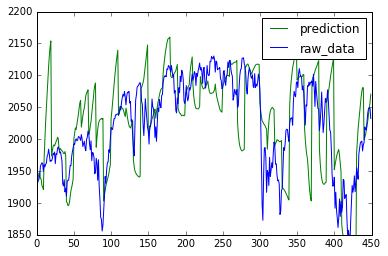

In [25]:
input_data_mini = input_data[:]
target_data_mini=target_data[:]
N_memory = 50
N_in = len(input_data[0])
N_hidden = int(0.2 * N_in)
N_out = 1
N_layer = 3


lstm = VanillaLSTM2(N_in, N_hidden, N_out, N_memory, is_initialized=True)

print ("start!")
st_s = time.time()
prediction = lstm.online_predict(input_data_mini, target_data_mini, 
                                 predict_length=10, N_epochs=1000)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

N_pred = len(prediction)
plt.plot(prediction, label="prediction", c='g')
num_data = len(prediction)
plt.plot(target_data_mini[N_memory:N_memory + num_data], label="raw_data", c='b')
plt.ylim(1850, 2200)
plt.legend()

start!
predict [50, 54]
predict [55, 59]
predict [60, 64]
predict [65, 69]
predict [70, 74]
predict [75, 79]
predict [80, 84]
predict [85, 89]
predict [90, 94]
predict [95, 99]
predict [100, 104]
predict [105, 109]
predict [110, 114]
predict [115, 119]
predict [120, 124]
predict [125, 129]
predict [130, 134]
predict [135, 139]
predict [140, 144]
predict [145, 149]
predict [150, 154]
predict [155, 159]
predict [160, 164]
predict [165, 169]
predict [170, 174]
predict [175, 179]
predict [180, 184]
predict [185, 189]
predict [190, 194]
predict [195, 199]
predict [200, 204]
predict [205, 209]
predict [210, 214]
predict [215, 219]
predict [220, 224]
predict [225, 229]
predict [230, 234]
predict [235, 239]
predict [240, 244]
predict [245, 249]
predict [250, 254]
predict [255, 259]
predict [260, 264]
predict [265, 269]
predict [270, 274]
predict [275, 279]
predict [280, 284]
predict [285, 289]
predict [290, 294]
predict [295, 299]
predict [300, 304]
predict [305, 309]
predict [310, 314]
predic

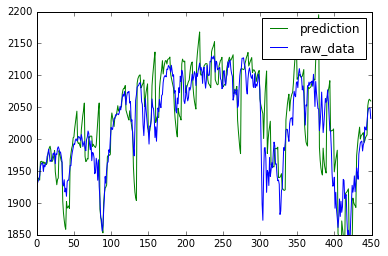

In [31]:
input_data_mini = input_data[:]
target_data_mini=target_data[:]
N_memory = 50
N_in = len(input_data[0])
N_hidden = int(0.2 * N_in)
N_out = 1
N_layer = 3


lstm = VanillaLSTM2(N_in, N_hidden, N_out, N_memory, is_initialized=True)

print ("start!")
st_s = time.time()
prediction = lstm.online_predict(input_data_mini, target_data_mini, 
                                 predict_length=5, N_epochs=100)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

N_pred = len(prediction)
plt.plot(prediction, label="prediction", c='g')
num_data = len(prediction)
plt.plot(target_data_mini[N_memory:N_memory + num_data], label="raw_data", c='b')
plt.ylim(1850, 2200)
plt.legend()

Compared with Chainer's results, it seems to make bad predictions. Let's modify it

## GridLSTM

In [20]:
class GridLSTM2(object):
    def __init__(self, num_in, num_hidden, num_out, num_memory,
                 num_layer, learning_rate=None, is_initialized=False):
        # Network Architechture
        self.num_in = num_in
        self.num_hidden = num_hidden
        self.num_out = num_out
        self.num_memory = num_memory
        self.num_layer = num_layer
        
        #delete graph you've made before
        if is_initialized:
            sess = tf.InteractiveSession()
            tf.reset_default_graph()
            sess.close()
        
        # Build Model
        self._input = tf.placeholder(tf.float32, [num_memory, num_in])
        self._target = tf.placeholder(tf.float32, [num_memory, num_out])
        self.W_out = self.weight_variable([N_hidden, N_out])
        self.b_out = self.bias_variable([N_out])
        
        # reshape input into [tf.Variable([batch=1 , 1]) * num_hidden] * num_memory
        _input_tilde = [tf.reshape(self._input[t, :], [1, num_in]) for t in xrange(num_memory)]
        
        # Build LSTM Graph
        cell = tf.contrib.grid_rnn.Grid2BasicLSTMCell(num_hidden)
        self._cell = tf.nn.rnn_cell.MultiRNNCell([cell] * num_layer)
        self._initial_state = self._cell.zero_state(1, tf.float32)
        state = self._initial_state
        with tf.variable_scope("LSTM"):
            cell_outputs, state = tf.nn.rnn(cell=self._cell, inputs=_input_tilde, initial_state=state)
            self._final_state = state

        # get the sahpe back to N_memory * N_hidden
        cell_outputs = tf.pack(cell_outputs)
        pre_outputs = tf.squeeze(cell_outputs)
        self.outputs = tf.matmul(pre_outputs, self.W_out) + self.b_out

        # training    
        self.loss = tf.reduce_mean(tf.square(self.outputs - self._target))
        if learning_rate is None:
            optimizer = tf.train.AdamOptimizer()
        else:
            optimizer = tf.train.AdamOptimizer(learning_rate)
        self.train = optimizer.minimize(self.loss)
        
    def weight_variable(self, shape):
        initial = tf.truncated_normal(shape, stddev=0.1)
        return tf.Variable(initial)

    def bias_variable(self, shape):
        initial = tf.constant(0.0, shape=shape)
        return tf.Variable(initial)

    def online_predict(self, input_data, target_data, predict_length=1, num_epochs=1000):
        df_input = np.log(input_data[1:] / input_data[:-1])
        df_target = np.log(target_data[1:] / target_data[:-1])
        with tf.variable_scope("prediction"):
            # additional input for prediction
            pred_input = tf.placeholder(tf.float32, [predict_length, self.num_in])
            pred_input_tilde = [tf.reshape(pred_input[t, :], [1, self.num_in]) for t in xrange(predict_length)]
            cell_outputs, state = tf.nn.rnn(cell=self._cell, inputs=pred_input_tilde, initial_state=self._final_state)
        # get the sahpe back to predict_length * N_hidden
        cell_outputs = tf.pack(cell_outputs)
        pre_outputs = tf.squeeze(cell_outputs, [1])
        outputs = tf.matmul(pre_outputs, self.W_out) + self.b_out
        num_data = len(df_input)
        outputs_list = []
        with tf.Session() as sess:
            tf.initialize_all_variables().run()
            for end in xrange(self.num_memory, num_data + predict_length, predict_length):
                beg = end - self.num_memory
                train_x = df_input[beg: end]
                if end + predict_length > num_data:
                    continue
                else:    
                    pred_x = df_input[end: end + predict_length]
                train_y = df_target[beg: end]
                for i in xrange(num_epochs):
                    sess.run(self.train, feed_dict={self._input: train_x, self._target: train_y})
                    # if i%10 == 0:
                    #    print ("loss = %e" % self.loss.eval(session=sess, feed_dict={self._input: train_x, self._target: train_y}))
                print ("predict [%d, %d]" % (end, end + predict_length - 1))
                rate = np.exp(outputs[:, 0].eval(session=sess, feed_dict={self._input: train_x, pred_input: pred_x}))
                outputs_list += list(target_data[end][0] * np.cumprod(rate))
        return outputs_list

start!
predict [50, 50]
predict [51, 51]
predict [52, 52]
predict [53, 53]
predict [54, 54]
predict [55, 55]
predict [56, 56]
predict [57, 57]
predict [58, 58]
learning_time: 148.306804895


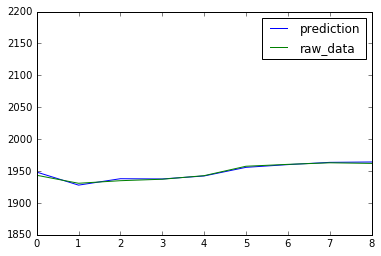

In [21]:
input_data_mini = input_data[:60]
target_data_mini=target_data[:60]
N_memory = 50
N_in = len(input_data[0])
N_hidden = int(0.2 * N_in)
N_out = 1
N_layer = 3


lstm = GridLSTM2(N_in, N_hidden, N_out, N_memory, N_layer, is_initialized=True)

print ("start!")
st_s = time.time()
prediction = lstm.online_predict(input_data_mini, target_data_mini, 
                                 predict_length=1, num_epochs=100)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

N_pred = len(prediction)
plt.plot(prediction, label="prediction", c="g'')
num_data = len(prediction)
plt.plot(target_data_mini[N_memory:N_memory + num_data], label="raw_data", c='b')
plt.ylim(1850, 2200)
plt.legend()

start!
predict [50, 59]
predict [60, 69]
predict [70, 79]
predict [80, 89]
predict [90, 99]
predict [100, 109]
predict [110, 119]
predict [120, 129]
predict [130, 139]
predict [140, 149]
predict [150, 159]
predict [160, 169]
predict [170, 179]
predict [180, 189]
predict [190, 199]
predict [200, 209]
predict [210, 219]
predict [220, 229]
predict [230, 239]
predict [240, 249]
predict [250, 259]
predict [260, 269]
predict [270, 279]
predict [280, 289]
predict [290, 299]
predict [300, 309]
predict [310, 319]
predict [320, 329]
predict [330, 339]
predict [340, 349]
predict [350, 359]
predict [360, 369]
predict [370, 379]
predict [380, 389]
predict [390, 399]
predict [400, 409]
predict [410, 419]
predict [420, 429]
predict [430, 439]
predict [440, 449]
predict [450, 459]
predict [460, 469]
predict [470, 479]
predict [480, 489]
predict [490, 499]
learning_time: 744.798382998


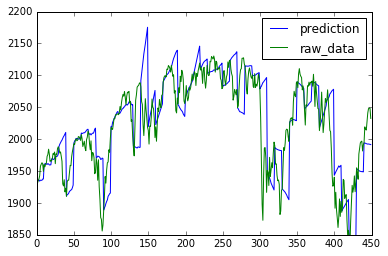

In [22]:
input_data_mini = input_data[:]
target_data_mini=target_data[:]
N_memory = 50
N_in = len(input_data[0])
N_hidden = int(0.2 * N_in)
N_out = 1
N_layer = 3


lstm = GridLSTM2(N_in, N_hidden, N_out, N_memory, N_layer, is_initialized=True)

print ("start!")
st_s = time.time()
prediction = lstm.online_predict(input_data_mini, target_data_mini, 
                                 predict_length=10, num_epochs=100)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

N_pred = len(prediction)
plt.plot(prediction, label="prediction", c='g')
num_data = len(prediction)
plt.plot(target_data_mini[N_memory:N_memory + num_data], label="raw_data", c='b')
plt.ylim(1850, 2200)
plt.legend()

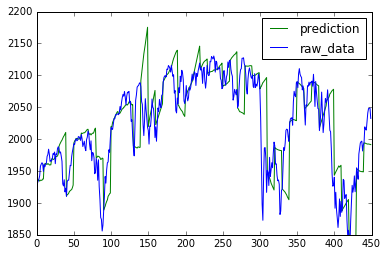

In [24]:
N_pred = len(prediction)
plt.plot(prediction, label="prediction", c='g')
num_data = len(prediction)
plt.plot(target_data_mini[N_memory:N_memory + num_data], label="raw_data", c='b')
plt.ylim(1850, 2200)
plt.legend()

In [ ]:
input_data_mini = input_data[:]
target_data_mini=target_data[:]
N_memory = 50
N_in = len(input_data[0])
N_hidden = int(0.2 * N_in)
N_out = 1
N_layer = 3


lstm = GridLSTM2(N_in, N_hidden, N_out, N_memory, N_layer, is_initialized=True)

print ("start!")
st_s = time.time()
prediction = lstm.online_predict(input_data_mini, target_data_mini, 
                                 predict_length=10, num_epochs=1000)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

N_pred = len(prediction)
plt.plot(prediction, label="prediction", c='g')
num_data = len(prediction)
plt.plot(target_data_mini[N_memory:N_memory + num_data], label="raw_data", c='b')
plt.ylim(1850, 2200)
plt.legend()

# Compared with Chainer's results

In [36]:
import chainer
from chainer import cuda, Function, gradient_check, Variable, optimizers, serializers, utils
from chainer import Link, Chain, ChainList
import chainer.functions as F
import chainer.links as L

In [89]:
import datetime
def convert_timedata_format(timedata):
    def convert_time_format(date):
        date_tilde = date.split("-")
        date_tilde = map(int, date_tilde)
        return datetime.datetime(*date_tilde)
    date_label=[]
    for i in xrange(len(timedata)):
        date_label.append(convert_time_format(timedata[i]))
    return date_label

In [90]:
date_tilde = list(date[0])

In [91]:
print (date_tilde[0])

2016-04-01


In [92]:
date_tilde = convert_timedata_format(date_tilde)

In [98]:
date_tilde.reverse()

In [151]:
class LSTM_chainer(Chain):
    def __init__(self, N_in, N_middle, N_out):
        super(LSTM_chainer, self).__init__(
            input = L.Linear(N_in, N_middle),
            mid = L.LSTM(N_middle, N_middle),
            output = L.Linear(N_middle, N_out),
        )
        
    def reset_state(self):
        self.mid.reset_state()
    
    def __call__(self, x):
        h1 = F.relu(self.input(x))
        h2 = F.relu(self.mid(h1))
        y = self.output(h2)
        return y
    
class Regression(Chain):
    def __init__(self, predictor):
        super(Regression, self).__init__(predictor=predictor)
        
    def __call__(self, x, y):
        output = self.predictor(x)
        self.loss = F.mean_squared_error(output, y)
        return self.loss

In [222]:
from itertools import izip


def online_train_chainer(lstm, model, optimizer, x_train, y_train, 
                             N_memory=100, renew_freq=10, N_epoch=10):
    prediction_list = [y_train[0]]
    df_input = np.log(x_train[1:] / x_train[:-1])
    df_target = np.log(y_train[1:] / y_train[:-1])
    df_target = df_target.reshape(len(df_target), 1)
    if N_memory <= renew_freq:
        N_memory = renew_freq
    #N_data will be the length of term -1
    N_data = len(df_input)
    N_renew = N_data / renew_freq
    print_every = N_renew / 10
    if print_every == 0:
        print_every = 1
    begin = 0
    for i in xrange(N_renew):
        end = (i + 1) * renew_freq
        future_end = end + renew_freq
        if i == N_renew - 1:
            if end == N_data:
                continue
            else:
                future_end = N_data
                
        #fix the number of data used for learning
        if end > N_memory:
            begin  = end - N_memory
            
            
        x_v = Variable(np.array(df_input[begin: end], dtype=np.float32))
        y_v = Variable(np.array(df_target[begin: end], dtype=np.float32))
        #learning
        for epoch in range(N_epoch):
            lstm.reset_state()
            model.zerograds()
            loss = model(x_v, y_v)
            loss.backward()
            optimizer.update()
        # prediction   
        x_v_pred = Variable(np.array(df_input[end: future_end], dtype=np.float32)) 
        y_v_pred = Variable(np.array(df_target[end: future_end], dtype=np.float32))
        lstm.reset_state()
        pre_out = Variable(x_v_pred.data)
        output = model.predictor(pre_out)
        print ("predict for  [%d, %d]" % (end, future_end))
        print (np.abs(np.cumprod(np.exp(output.data - y_v_pred.data)) - 1.0))
        prediction = y_train[end] * np.cumprod(np.exp(output.data))
        prediction_list += list(prediction)
    return prediction_list

predict for  [5, 10]
[ 0.0116533   0.02352279  0.00161326  0.00226009  0.00773239]
predict for  [10, 15]
[ 0.01259255  0.0194602   0.01832581  0.02406859  0.03537017]
predict for  [15, 20]
[ 0.00174719  0.00771999  0.00607008  0.00926709  0.01182669]
predict for  [20, 25]
[  6.72924519e-03   4.61101532e-04   7.26699829e-03   8.18967819e-05
   8.28027725e-03]
predict for  [25, 30]
[ 0.00307959  0.00472236  0.00289249  0.00971001  0.00805295]
predict for  [30, 35]
[ 0.00344682  0.02178025  0.01834595  0.01984835  0.03377688]
predict for  [35, 40]
[ 0.00111765  0.01160884  0.01899081  0.02281892  0.02123493]
predict for  [40, 45]
[ 0.00133806  0.00708449  0.00825518  0.00011659  0.00145853]
predict for  [45, 50]
[ 0.00681078  0.01123208  0.0111649   0.01333719  0.01666087]
predict for  [50, 55]
[ 0.01287353  0.01017845  0.00823724  0.00800991  0.00418496]
predict for  [55, 60]
[ 0.00195861  0.00026596  0.00442028  0.00729656  0.00064063]
predict for  [60, 65]
[ 0.00119984  0.00473845  0.0

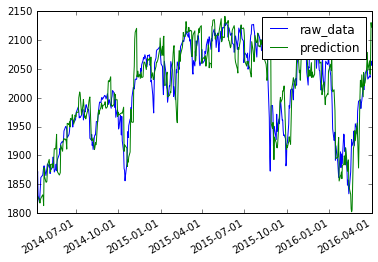

In [298]:
import time

N_in = len(input_list)
N_middle=int(0.2 * N_in)
N_out = 1
freq = 5

N_epoch = 100
N_memory = max(2 * freq, 50)
lstm = LSTM_chainer(N_in, N_middle, N_out)
model = Regression(lstm)
optimizer = optimizers.Adam()
optimizer.setup(model)
st = time.time()
prediction = online_train_chainer(lstm, model, optimizer, input_data, target_data, 
                             N_memory=N_memory, renew_freq=freq, N_epoch=N_epoch)  
N_pred = len(prediction)
lasped_time = time.time() - st
print ("time for prediction: %f" % lasped_time)

import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import text


# データをセット
fig = plt.figure()
ax = fig.add_subplot(111)


N_data = len(input_data)
N_freq = N_data / freq
"""
for i in xrange(N_freq):
    ax.scatter(date_tilde[i * freq], target_data[i * freq])
"""
ax.plot(date_tilde[-N_pred:], target_data[-N_pred:], label="raw_data", c='b')
ax.plot(date_tilde[-N_pred:], prediction, label="prediction", c='g')
plt.xlim(date_tilde[-N_pred], date_tilde[-1])
plt.ylim(1800, 2150)

# グラフのフォーマットの設定
days      = mdates.AutoDateLocator()  
daysFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
fig.autofmt_xdate()

# text(date[0],    1700, "symbol: %d \n" % len(input_list) +  input_str, ha = 'left', va = 'top') 

plt.legend() 


predict for  [5, 10]
[ 0.00087011  0.00777239  0.01576376  0.02361929  0.01559317]
predict for  [10, 15]
[ 0.00805706  0.01843196  0.02260888  0.02511775  0.02764791]
predict for  [15, 20]
[ 0.00028861  0.00327694  0.01142681  0.0077368   0.00403011]
predict for  [20, 25]
[ 0.0034017   0.00175637  0.00086868  0.00287294  0.00599349]
predict for  [25, 30]
[ 0.00485122  0.00113857  0.00344425  0.00969011  0.0085727 ]
predict for  [30, 35]
[ 0.00447917  0.01549888  0.01385033  0.01438284  0.02280772]
predict for  [35, 40]
[ 0.00744241  0.0147078   0.02187705  0.02178925  0.02134591]
predict for  [40, 45]
[ 0.00711995  0.00918186  0.01082265  0.00787562  0.01178223]
predict for  [45, 50]
[ 0.00591123  0.0059377   0.00404096  0.00450951  0.00161487]
predict for  [50, 55]
[  5.44524193e-03   2.60269642e-03   2.39300728e-03   2.06828117e-05
   6.37930632e-03]
predict for  [55, 60]
[ 0.00102293  0.00082076  0.00096571  0.01222861  0.00829351]
predict for  [60, 65]
[ 0.00273275  0.00065321  0.0

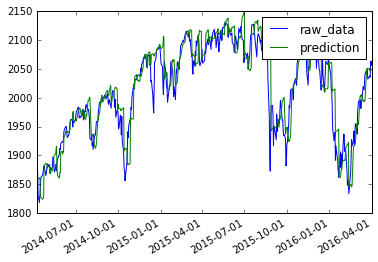

In [300]:
import time

N_in = len(input_list)
N_middle=int(0.2 * N_in)
N_out = 1
freq = 5

N_epoch = 0
N_memory = max(2 * freq, 50)
lstm = LSTM_chainer(N_in, N_middle, N_out)
model = Regression(lstm)
optimizer = optimizers.Adam()
optimizer.setup(model)
st = time.time()
prediction = online_train_chainer(lstm, model, optimizer, input_data, target_data, 
                             N_memory=N_memory, renew_freq=freq, N_epoch=N_epoch)  
N_pred = len(prediction)
lasped_time = time.time() - st
print ("time for prediction: %f" % lasped_time)

import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import text


# データをセット
fig = plt.figure()
ax = fig.add_subplot(111)


N_data = len(input_data)
N_freq = N_data / freq
"""
for i in xrange(N_freq):
    ax.scatter(date_tilde[i * freq], target_data[i * freq])
"""
ax.plot(date_tilde[-N_pred:], target_data[-N_pred:], label="raw_data", c='b')
ax.plot(date_tilde[-N_pred:], prediction, label="prediction", c='g')
plt.xlim(date_tilde[-N_pred], date_tilde[-1])
plt.ylim(1800, 2150)

# グラフのフォーマットの設定
days      = mdates.AutoDateLocator()  
daysFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)
fig.autofmt_xdate()

# text(date[0],    1700, "symbol: %d \n" % len(input_list) +  input_str, ha = 'left', va = 'top') 

plt.legend() 

In [186]:
class VanillaLSTM3(object):
    def __init__(self, N_in, N_hidden, N_out, N_memory=100,
                 learning_rate=None, is_initialized=False):
        self.N_in = N_in
        self.N_hidden = N_hidden
        self.N_out = N_out
        self.N_memory = N_memory
        
        if is_initialized:
            sess = tf.InteractiveSession()
            tf.reset_default_graph() # reset the graph under sess
            sess.close()
        
        self._input = tf.placeholder(tf.float32, [N_memory, N_in])
        self._target = tf.placeholder(tf.float32, [N_memory, N_out])
        # Build Model
        # self.W_in = self.weight_variable([N_in, N_hidden])
        # self.b_in = self.bias_variable([N_hidden])
        self.W_out = self.weight_variable([N_hidden, N_out])
        self.b_out = self.bias_variable([N_out])
        # reshape for batch computation
        # zs = tf.matmul(self._input, self.W_in) + self.b_in
        # this is for input of tf.rnn.rnn
        # zs_tilde = [tf.reshape(zs[i, :], [1, N_hidden]) for i in xrange(N_memory)]
        input_tilde = [tf.reshape(self._input[i, :], [1, N_in]) for i in xrange(N_memory)]
        
        # build LSTM graph
        self.cell = cell = tf.nn.rnn_cell.BasicLSTMCell(N_hidden)
        self._initial_state = cell.zero_state(1, tf.float32)
        print (self._initial_state)
        with tf.variable_scope("VanillaLSTM"):
            cell_outputs, state = tf.nn.rnn(cell=self.cell, inputs=input_tilde, initial_state=self._initial_state)
            # cell_outputs, state = tf.nn.rnn(cell=self.cell, inputs=input_tilde)
            self._final_state = state
        # get the sahpe back to N_memory * N_hidden
        cell_outputs = tf.pack(cell_outputs)
        pre_outputs = tf.squeeze(cell_outputs, [1])
        self.outputs = tf.matmul(pre_outputs, self.W_out) + self.b_out
        # training    
        print (self.outputs.get_shape().as_list(), self._target.get_shape().as_list())
        self.loss = tf.reduce_mean(tf.square(self.outputs - self._target))
        if learning_rate is None:
            optimizer = tf.train.AdamOptimizer()
        else:
            optimizer = tf.train.AdamOptimizer(learning_rate)
        self.train = optimizer.minimize(self.loss)
        
    def weight_variable(self, shape):
        initial = tf.truncated_normal(shape, stddev=0.1)
        return tf.Variable(initial)

    def bias_variable(self, shape):
        initial = tf.constant(0.0, shape=shape)
        return tf.Variable(initial)

    def online_predict(self, input_data, target_data, predict_length=1, N_epochs=1000):
        df_input = np.log(input_data[1:] / input_data[:-1])
        df_target = np.log(target_data[1:] / target_data[:-1])
        # additional input for prediction
        pred_input = tf.placeholder(tf.float32, [predict_length, N_in])
        pred_input_tilde = [tf.reshape(pred_input[t, :], [1, N_in]) for t in xrange(predict_length)]
        with tf.variable_scope("VanillaLSTM", reuse=True):
            cell_outputs, state = tf.nn.rnn(cell=self.cell, inputs=pred_input_tilde, initial_state=self._final_state)
        # get the sahpe back to predict_length * N_hidden
        cell_outputs = tf.pack(cell_outputs)
        pre_outputs = tf.squeeze(cell_outputs, [1])
        outputs = tf.matmul(pre_outputs, self.W_out) + self.b_out
        N_data = len(df_input)
        outputs_list = []
        init_op = tf.initialize_all_variables()
        with tf.Session() as sess:
            sess.run(init_op)
            for end in xrange(self.N_memory, N_data + predict_length, predict_length):
                beg = end - self.N_memory
                train_x = df_input[beg: end]
                if end + predict_length > N_data:
                    continue
                else:    
                    pred_x = df_input[end: end + predict_length]
                    pred_y = df_target[end: end + predict_length]
                    # pred_x = df_input[end  + predict_length - self.N_memory: end  + predict_length]
                train_y = df_target[beg: end]
                for i in xrange(N_epochs):
                    sess.run(self.train, feed_dict={self._input: train_x, self._target: train_y})
                    # if i%10 == 0:
                print ("loss = %e" % self.loss.eval(session=sess, feed_dict={self._input: train_x, self._target: train_y}))
                print ("predict [%d, %d]" % (end, end + predict_length - 1))
                result = outputs[:, 0].eval(session=sess, feed_dict={self._input: train_x, pred_input: pred_x})
                # result = self.outputs[:, 0].eval(session=sess, feed_dict={self._input: pred_x})[-predict_length:]
                print (np.abs(np.cumprod(np.exp(result - pred_y[:, 0])) - 1.0))
                rate = np.exp(result)
                outputs_list += list(target_data[end][0] * np.cumprod(rate))
        return outputs_list

Tensor("zeros:0", shape=(1, 108), dtype=float32)
[50, 1] [50, 1]
start!
loss = 2.131505e-07
predict [50, 54]
[ 0.00758231  0.00064942  0.00063768  0.00217866  0.01402479]
loss = 1.452853e-10
predict [55, 59]
[ 0.00629688  0.00413199  0.00296057  0.00277476  0.00584675]
loss = 5.638626e-11
predict [60, 64]
[ 0.00951658  0.03212254  0.04820573  0.05339064  0.06056275]
loss = 6.620853e-09
predict [65, 69]
[ 0.00543242  0.03214166  0.0585905   0.06570952  0.06826201]
loss = 9.557358e-09
predict [70, 74]
[  8.58449705e-05   1.19167540e-03   7.68552060e-03   1.26355318e-02
   2.48570223e-02]
loss = 1.208304e-09
predict [75, 79]
[ 0.0096733   0.00904339  0.01817417  0.01565422  0.01100029]
loss = 1.903860e-09
predict [80, 84]
[ 0.00030525  0.00297775  0.00936047  0.01342261  0.02820105]
loss = 1.024052e-09
predict [85, 89]
[ 0.01616633  0.03701935  0.04302736  0.05418471  0.05510238]
loss = 2.410494e-09
predict [90, 94]
[ 0.01168011  0.00686424  0.00325459  0.00558834  0.00699249]
loss = 9.69

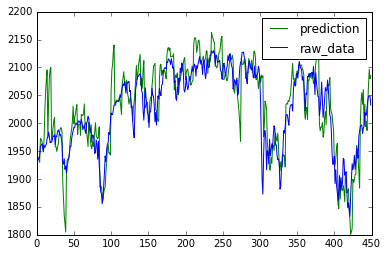

In [187]:
input_data_mini = input_data[:]
target_data_mini=target_data[:]
N_memory = 50
N_in = len(input_data[0])
N_hidden = int(0.2 * N_in)
N_out = 1
N_layer = 3


lstm = VanillaLSTM3(N_in, N_hidden, N_out, N_memory, is_initialized=True)

print ("start!")
st_s = time.time()
prediction = lstm.online_predict(input_data_mini, target_data_mini, 
                                 predict_length=5, N_epochs=100)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

N_pred = len(prediction)
plt.plot(prediction, label="prediction", c='g')
num_data = len(prediction)
plt.plot(target_data_mini[N_memory:N_memory + num_data], label="raw_data", c='b')
plt.ylim(1800, 2200)
plt.legend()

Tensor("zeros:0", shape=(1, 108), dtype=float32)
[50, 1] [50, 1]
start!
loss = 6.296614e-05
predict [50, 54]
[ 0.01532085  0.02263291  0.03070429  0.03180257  0.02800299]
loss = 3.388931e-05
predict [55, 59]
[ 0.00141511  0.00575638  0.00888503  0.00605163  0.01086316]
loss = 2.229270e-05
predict [60, 64]
[ 0.00127794  0.01204102  0.02040769  0.02215466  0.029209  ]
loss = 2.970051e-05
predict [65, 69]
[ 0.00185482  0.01042203  0.01405708  0.02184574  0.03337828]
loss = 2.873149e-05
predict [70, 74]
[ 0.01509817  0.02787492  0.03457216  0.04253645  0.04072364]
loss = 2.496953e-05
predict [75, 79]
[ 0.01221904  0.01456188  0.02393747  0.02238294  0.01527078]
loss = 2.340588e-05
predict [80, 84]
[ 0.0090813   0.01156793  0.01900305  0.02368745  0.04269239]
loss = 3.042876e-05
predict [85, 89]
[ 0.00146536  0.01039117  0.00285099  0.00597309  0.00202901]
loss = 2.882753e-05
predict [90, 94]
[ 0.01114171  0.00974285  0.00321175  0.006767    0.01484755]
loss = 3.040762e-05
predict [95, 99]


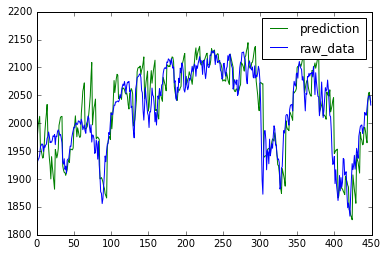

In [188]:
input_data_mini = input_data[:]
target_data_mini=target_data[:]
N_memory = 50
N_in = len(input_data[0])
N_hidden = int(0.2 * N_in)
N_out = 1
N_layer = 3


lstm = VanillaLSTM3(N_in, N_hidden, N_out, N_memory, is_initialized=True)

print ("start!")
st_s = time.time()
prediction = lstm.online_predict(input_data_mini, target_data_mini, 
                                 predict_length=5, N_epochs=1)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

N_pred = len(prediction)
plt.plot(prediction, label="prediction", c='g')
num_data = len(prediction)
plt.plot(target_data_mini[N_memory:N_memory + num_data], label="raw_data", c='b')
plt.ylim(1800, 2200)
plt.legend()

In [196]:
class GridLSTM3(object):
    def __init__(self, num_in, num_hidden, num_out, num_memory,
                 num_layer, learning_rate=None, is_initialized=False):
        # Network Architechture
        self.num_in = num_in
        self.num_hidden = num_hidden
        self.num_out = num_out
        self.num_memory = num_memory
        self.num_layer = num_layer
        
        #delete graph you've made before
        if is_initialized:
            sess = tf.InteractiveSession()
            tf.reset_default_graph()
            sess.close()
        
        # Build Model
        self._input = tf.placeholder(tf.float32, [num_memory, num_in])
        self._target = tf.placeholder(tf.float32, [num_memory, num_out])
        self.W_out = self.weight_variable([N_hidden, N_out])
        self.b_out = self.bias_variable([N_out])
        
        # reshape input into [tf.Variable([batch=1 , 1]) * num_hidden] * num_memory
        _input_tilde = [tf.reshape(self._input[t, :], [1, num_in]) for t in xrange(num_memory)]
        
        # Build LSTM Graph
        cell = tf.contrib.grid_rnn.Grid2BasicLSTMCell(num_hidden)
        self._cell = tf.nn.rnn_cell.MultiRNNCell([cell] * num_layer)
        self._initial_state = self._cell.zero_state(1, tf.float32)
        with tf.variable_scope("LSTM"):
            cell_outputs, state = tf.nn.rnn(cell=self._cell, inputs=_input_tilde, initial_state=self._initial_state)
            self._final_state = state

        # get the sahpe back to N_memory * N_hidden
        cell_outputs = tf.pack(cell_outputs)
        pre_outputs = tf.squeeze(cell_outputs)
        self.outputs = tf.matmul(pre_outputs, self.W_out) + self.b_out

        # training    
        self.loss = tf.reduce_mean(tf.square(self.outputs - self._target))
        if learning_rate is None:
            optimizer = tf.train.AdamOptimizer()
        else:
            optimizer = tf.train.AdamOptimizer(learning_rate)
        self.train = optimizer.minimize(self.loss)
        
    def weight_variable(self, shape):
        initial = tf.truncated_normal(shape, stddev=0.1)
        return tf.Variable(initial)

    def bias_variable(self, shape):
        initial = tf.constant(0.0, shape=shape)
        return tf.Variable(initial)

    def online_predict(self, input_data, target_data, predict_length=1, num_epochs=1000):
        df_input = np.log(input_data[1:] / input_data[:-1])
        df_target = np.log(target_data[1:] / target_data[:-1])
        with tf.variable_scope("LSTM", reuse=True):
            # additional input for prediction
            pred_input = tf.placeholder(tf.float32, [predict_length, self.num_in])
            pred_input_tilde = [tf.reshape(pred_input[t, :], [1, self.num_in]) for t in xrange(predict_length)]
            cell_outputs, state = tf.nn.rnn(cell=self._cell, inputs=pred_input_tilde, initial_state=self._final_state)
        # get the sahpe back to predict_length * N_hidden
        cell_outputs = tf.pack(cell_outputs)
        pre_outputs = tf.squeeze(cell_outputs, [1])
        outputs = tf.matmul(pre_outputs, self.W_out) + self.b_out
        N_data = len(df_input)
        outputs_list = []
        init_op = tf.initialize_all_variables()
        with tf.Session() as sess:
            sess.run(init_op)
            for end in xrange(self.num_memory, N_data + predict_length, predict_length):
                beg = end - self.num_memory
                train_x = df_input[beg: end]
                if end + predict_length > N_data:
                    continue
                else:    
                    pred_x = df_input[end: end + predict_length]
                    pred_y = df_target[end: end + predict_length]
                    # pred_x = df_input[end  + predict_length - self.N_memory: end  + predict_length]
                train_y = df_target[beg: end]
                for i in xrange(num_epochs):
                    sess.run(self.train, feed_dict={self._input: train_x, self._target: train_y})
                    # if i%10 == 0:
                print ("loss = %e" % self.loss.eval(session=sess, feed_dict={self._input: train_x, self._target: train_y}))
                print ("predict [%d, %d]" % (end, end + predict_length - 1))
                result = outputs[:, 0].eval(session=sess, feed_dict={self._input: train_x, pred_input: pred_x})
                # result = self.outputs[:, 0].eval(session=sess, feed_dict={self._input: pred_x})[-predict_length:]
                print (np.abs(np.cumprod(np.exp(result - pred_y[:, 0])) - 1.0))
                rate = np.exp(result)
                outputs_list += list(target_data[end][0] * np.cumprod(rate))
        return outputs_list

start!
loss = 1.113142e-09
predict [50, 54]
[ 0.01179738  0.00297976  0.00545874  0.00352887  0.01005585]
loss = 1.097270e-10
predict [55, 59]
[ 0.00285229  0.000387    0.00906     0.01109048  0.00496131]
loss = 4.668299e-11
predict [60, 64]
[ 0.00168923  0.01192867  0.01539356  0.01395398  0.01676703]
loss = 1.567352e-11
predict [65, 69]
[ 0.0029961   0.0252081   0.03425473  0.03426138  0.03272822]
loss = 1.288638e-10
predict [70, 74]
[ 0.0010165   0.00066013  0.00279367  0.0052006   0.01536826]
loss = 4.771181e-11
predict [75, 79]
[ 0.00857394  0.00830333  0.01713841  0.01282423  0.00802477]
loss = 4.443785e-11
predict [80, 84]
[ 0.00272504  0.0080271   0.01437633  0.0162145   0.03330927]
loss = 8.385773e-11
predict [85, 89]
[ 0.0053329   0.01739298  0.01513113  0.02011117  0.01347926]
loss = 6.690873e-11
predict [90, 94]
[ 0.01669566  0.01416194  0.01456722  0.02430687  0.02683728]
loss = 9.360378e-11
predict [95, 99]
[ 0.00509066  0.00148544  0.00109617  0.00116575  0.00111276]
los

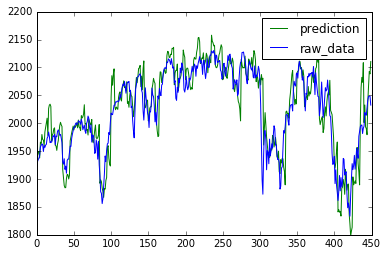

In [197]:
input_data_mini = input_data[:]
target_data_mini=target_data[:]
N_memory = 50
N_in = len(input_data[0])
N_hidden = int(0.2 * N_in)
N_out = 1
N_layer = 3


lstm = GridLSTM3(N_in, N_hidden, N_out, N_memory, N_layer, is_initialized=True)

print ("start!")
st_s = time.time()
prediction = lstm.online_predict(input_data_mini, target_data_mini, 
                                 predict_length=5, num_epochs=100)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

N_pred = len(prediction)
plt.plot(prediction, label="prediction", c='g')
num_data = len(prediction)
plt.plot(target_data_mini[N_memory:N_memory + num_data], label="raw_data", c='b')
plt.ylim(1800, 2200)
plt.legend()

start!
loss = 4.044372e-05
predict [50, 54]
[ 0.00894001  0.0093863   0.01034541  0.0111614   0.00754846]
loss = 3.025011e-05
predict [55, 59]
[  6.54652064e-05   7.64927611e-04   3.89586372e-03   1.12031579e-02
   7.66862380e-03]
loss = 1.706177e-05
predict [60, 64]
[  2.19671401e-03   5.53641434e-05   7.68223669e-06   4.74960139e-03
   5.10870921e-03]
loss = 1.564253e-05
predict [65, 69]
[ 0.00389693  0.00345472  0.00957499  0.00859824  0.00901613]
loss = 1.551532e-05
predict [70, 74]
[ 0.00158853  0.00442441  0.00263974  0.00428741  0.00547588]
loss = 1.497862e-05
predict [75, 79]
[ 0.00696363  0.00547244  0.00945436  0.01249967  0.00931276]
loss = 1.488570e-05
predict [80, 84]
[ 0.00456633  0.00527122  0.01009086  0.01552756  0.03533261]
loss = 2.000368e-05
predict [85, 89]
[ 0.00263729  0.00287327  0.00759851  0.00472247  0.01192684]
loss = 2.136740e-05
predict [90, 94]
[ 0.01120519  0.01263453  0.01192435  0.01747241  0.02348869]
loss = 2.465593e-05
predict [95, 99]
[  2.45926998

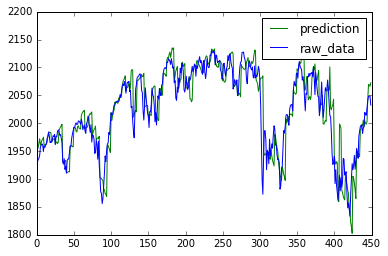

In [198]:
input_data_mini = input_data[:]
target_data_mini=target_data[:]
N_memory = 50
N_in = len(input_data[0])
N_hidden = int(0.2 * N_in)
N_out = 1
N_layer = 3


lstm = GridLSTM3(N_in, N_hidden, N_out, N_memory, N_layer, is_initialized=True)

print ("start!")
st_s = time.time()
prediction = lstm.online_predict(input_data_mini, target_data_mini, 
                                 predict_length=5, num_epochs=1)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

N_pred = len(prediction)
plt.plot(prediction, label="prediction", c='g')
num_data = len(prediction)
plt.plot(target_data_mini[N_memory:N_memory + num_data], label="raw_data", c='b')
plt.ylim(1800, 2200)
plt.legend()

start!
loss = 3.934985e-05
predict [50, 54]
[ 0.0077118   0.00481031  0.00549222  0.00425005  0.00405372]
loss = 3.551492e-05
predict [55, 59]
[ 0.00153576  0.00324954  0.00306084  0.00305579  0.00175313]
loss = 2.306487e-05
predict [60, 64]
[  1.50714112e-03   2.31652944e-05   2.07427255e-04   4.88269983e-03
   6.28160259e-03]
loss = 2.022330e-05
predict [65, 69]
[ 0.00436714  0.00161531  0.00403514  0.00346827  0.00341114]
loss = 2.005630e-05
predict [70, 74]
[ 0.00010006  0.0041087   0.00383984  0.0055047   0.00414948]
loss = 2.002627e-05
predict [75, 79]
[ 0.00762868  0.00649086  0.01134084  0.01226446  0.01166879]
loss = 1.920509e-05
predict [80, 84]
[ 0.00216854  0.00122595  0.00416806  0.00850907  0.02767592]
loss = 2.379854e-05
predict [85, 89]
[ 0.00100895  0.00316388  0.00837772  0.00452631  0.01129822]
loss = 2.473291e-05
predict [90, 94]
[ 0.01263995  0.01331525  0.01430668  0.0196456   0.02576861]
loss = 2.858149e-05
predict [95, 99]
[ 0.0002401   0.00784216  0.01153922  0

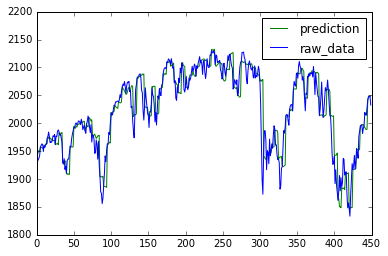

In [199]:
input_data_mini = input_data[:]
target_data_mini=target_data[:]
N_memory = 50
N_in = len(input_data[0])
N_hidden = int(0.2 * N_in)
N_out = 1
N_layer = 3


lstm = GridLSTM3(N_in, N_hidden, N_out, N_memory, N_layer, is_initialized=True)

print ("start!")
st_s = time.time()
prediction = lstm.online_predict(input_data_mini, target_data_mini, 
                                 predict_length=5, num_epochs=0)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

N_pred = len(prediction)
plt.plot(prediction, label="prediction", c='g')
num_data = len(prediction)
plt.plot(target_data_mini[N_memory:N_memory + num_data], label="raw_data", c='b')
plt.ylim(1800, 2200)
plt.legend()

It seems that models with tensorflow fails in learning......

The more they learn, the worse they perform......

Over fitting?

In [210]:
class VanillaLSTM4(object):
    def __init__(self, N_in, N_hidden, N_out, N_memory=100,
                 learning_rate=None, is_initialized=False):
        self.N_in = N_in
        self.N_hidden = N_hidden
        self.N_out = N_out
        self.N_memory = N_memory
        
        if is_initialized:
            sess = tf.InteractiveSession()
            tf.reset_default_graph() # reset the graph under sess
            sess.close()
        
        self._input = tf.placeholder(tf.float32, [N_memory, N_in])
        self._target = tf.placeholder(tf.float32, [N_memory, N_out])
        # Build Model
        # self.W_in = self.weight_variable([N_in, N_hidden])
        # self.b_in = self.bias_variable([N_hidden])
        self.W_out = self.weight_variable([N_hidden, N_out])
        self.b_out = self.bias_variable([N_out])
        # reshape for batch computation
        # zs = tf.matmul(self._input, self.W_in) + self.b_in
        # this is for input of tf.rnn.rnn
        # zs_tilde = [tf.reshape(zs[i, :], [1, N_hidden]) for i in xrange(N_memory)]
        input_tilde = [tf.reshape(self._input[i, :], [1, N_in]) for i in xrange(N_memory)]
        
        # build LSTM graph
        self.cell = cell = tf.nn.rnn_cell.BasicLSTMCell(N_hidden, activation=tf.nn.relu)
        self._initial_state = cell.zero_state(1, tf.float32)
        print (self._initial_state)
        with tf.variable_scope("VanillaLSTM"):
            cell_outputs, state = tf.nn.rnn(cell=self.cell, inputs=input_tilde, initial_state=self._initial_state)
            # cell_outputs, state = tf.nn.rnn(cell=self.cell, inputs=input_tilde)
            self._final_state = state
        # get the sahpe back to N_memory * N_hidden
        cell_outputs = tf.pack(cell_outputs)
        pre_outputs = tf.squeeze(cell_outputs, [1])
        self.outputs = tf.matmul(pre_outputs, self.W_out) + self.b_out
        # training    
        print (self.outputs.get_shape().as_list(), self._target.get_shape().as_list())
        self.loss = tf.reduce_mean(tf.square(self.outputs - self._target))
        if learning_rate is None:
            optimizer = tf.train.AdamOptimizer()
        else:
            optimizer = tf.train.AdamOptimizer(learning_rate)
        self.train = optimizer.minimize(self.loss)
        
    def weight_variable(self, shape):
        initial = tf.truncated_normal(shape, stddev=0.1)
        return tf.Variable(initial)

    def bias_variable(self, shape):
        initial = tf.constant(0.0, shape=shape)
        return tf.Variable(initial)

    def online_predict(self, input_data, target_data, predict_length=1, N_epochs=1000):
        df_input = np.log(input_data[1:] / input_data[:-1])
        df_target = np.log(target_data[1:] / target_data[:-1])
        # additional input for prediction
        pred_input = tf.placeholder(tf.float32, [predict_length, N_in])
        pred_input_tilde = [tf.reshape(pred_input[t, :], [1, N_in]) for t in xrange(predict_length)]
        with tf.variable_scope("VanillaLSTM", reuse=True):
            cell_outputs, state = tf.nn.rnn(cell=self.cell, inputs=pred_input_tilde, initial_state=self._final_state)
        # get the sahpe back to predict_length * N_hidden
        cell_outputs = tf.pack(cell_outputs)
        pre_outputs = tf.squeeze(cell_outputs, [1])
        outputs = tf.matmul(pre_outputs, self.W_out) + self.b_out
        N_data = len(df_input)
        outputs_list = []
        init_op = tf.initialize_all_variables()
        with tf.Session() as sess:
            sess.run(init_op)
            for end in xrange(self.N_memory, N_data + predict_length, predict_length):
                beg = end - self.N_memory
                train_x = df_input[beg: end]
                if end + predict_length > N_data:
                    continue
                else:    
                    pred_x = df_input[end: end + predict_length]
                    pred_y = df_target[end: end + predict_length]
                    # pred_x = df_input[end  + predict_length - self.N_memory: end  + predict_length]
                train_y = df_target[beg: end]
                for i in xrange(N_epochs):
                    sess.run(self.train, feed_dict={self._input: train_x, self._target: train_y})
                    # if i%10 == 0:
                print ("loss = %e" % self.loss.eval(session=sess, feed_dict={self._input: train_x, self._target: train_y}))
                print ("predict [%d, %d]" % (end, end + predict_length - 1))
                result = outputs[:, 0].eval(session=sess, feed_dict={self._input: train_x, pred_input: pred_x})
                # result = self.outputs[:, 0].eval(session=sess, feed_dict={self._input: pred_x})[-predict_length:]
                print (np.abs(np.cumprod(np.exp(result - pred_y[:, 0])) - 1.0))
                rate = np.exp(result)
                outputs_list += list(target_data[end][0] * np.cumprod(rate))
        return outputs_list

Tensor("zeros:0", shape=(1, 108), dtype=float32)
[50, 1] [50, 1]
start!
loss = 4.623894e-07
predict [50, 54]
[ 0.00782668  0.00666788  0.00596415  0.00032822  0.00961841]
loss = 1.208094e-10
predict [55, 59]
[ 0.00610174  0.00933778  0.01430094  0.0143196   0.00487319]
loss = 6.660776e-11
predict [60, 64]
[ 0.00749144  0.01959439  0.03089189  0.03413779  0.04156865]
loss = 1.634307e-09
predict [65, 69]
[ 0.00189276  0.01672751  0.03194642  0.03524334  0.03894713]
loss = 1.932244e-10
predict [70, 74]
[ 0.00122358  0.00124266  0.00647541  0.00537122  0.01868777]
loss = 9.663621e-11
predict [75, 79]
[ 0.01027382  0.01015975  0.01755805  0.01622871  0.00997028]
loss = 8.580714e-11
predict [80, 84]
[ 0.00369958  0.0066561   0.01163858  0.01618025  0.03343057]
loss = 6.987130e-11
predict [85, 89]
[ 0.01481371  0.03311872  0.03555409  0.04795382  0.05717658]
loss = 1.520913e-10
predict [90, 94]
[ 0.01365366  0.01348798  0.00782752  0.01218741  0.01608357]
loss = 7.460024e-11
predict [95, 99]


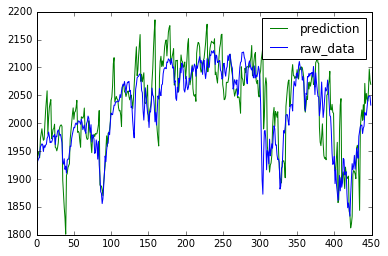

In [211]:
input_data_mini = input_data[:]
target_data_mini=target_data[:]
N_memory = 50
N_in = len(input_data[0])
N_hidden = int(0.2 * N_in)
N_out = 1
N_layer = 3


lstm = VanillaLSTM4(N_in, N_hidden, N_out, N_memory, is_initialized=True)

print ("start!")
st_s = time.time()
prediction = lstm.online_predict(input_data_mini, target_data_mini, 
                                 predict_length=5, N_epochs=100)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

N_pred = len(prediction)
plt.plot(prediction, label="prediction", c='g')
num_data = len(prediction)
plt.plot(target_data_mini[N_memory:N_memory + num_data], label="raw_data", c='b')
plt.ylim(1800, 2200)
plt.legend()

Tensor("zeros:0", shape=(1, 108), dtype=float32)
[50, 1] [50, 1]
start!
loss = 5.341841e-05
predict [50, 54]
[ 0.0122944   0.01466542  0.01493287  0.01467772  0.00723039]
loss = 3.259474e-05
predict [55, 59]
[ 0.00292134  0.00588944  0.00719607  0.0002303   0.00390307]
loss = 2.352471e-05
predict [60, 64]
[ 0.00359674  0.00504413  0.00686259  0.00314772  0.00306438]
loss = 1.944017e-05
predict [65, 69]
[ 0.00261175  0.00246875  0.00226569  0.0092251   0.01312916]
loss = 1.697807e-05
predict [70, 74]
[ 0.00133009  0.00770534  0.00985829  0.01506615  0.00830488]
loss = 1.716333e-05
predict [75, 79]
[ 0.00827105  0.00735108  0.01152825  0.01541211  0.01820524]
loss = 1.516584e-05
predict [80, 84]
[ 0.00108261  0.0072371   0.00863939  0.00745918  0.00932289]
loss = 1.648513e-05
predict [85, 89]
[ 0.00262479  0.01005434  0.00040557  0.00284521  0.00427771]
loss = 1.964593e-05
predict [90, 94]
[ 0.01156133  0.0125744   0.01145378  0.01823686  0.02642841]
loss = 2.332096e-05
predict [95, 99]


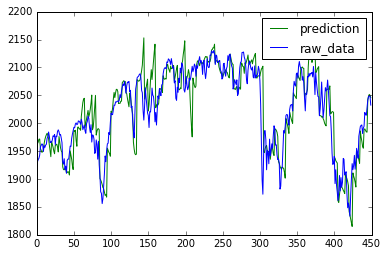

In [212]:
input_data_mini = input_data[:]
target_data_mini=target_data[:]
N_memory = 50
N_in = len(input_data[0])
N_hidden = int(0.2 * N_in)
N_out = 1
N_layer = 3


lstm = VanillaLSTM4(N_in, N_hidden, N_out, N_memory, is_initialized=True)

print ("start!")
st_s = time.time()
prediction = lstm.online_predict(input_data_mini, target_data_mini, 
                                 predict_length=5, N_epochs=1)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

N_pred = len(prediction)
plt.plot(prediction, label="prediction", c='g')
num_data = len(prediction)
plt.plot(target_data_mini[N_memory:N_memory + num_data], label="raw_data", c='b')
plt.ylim(1800, 2200)
plt.legend()

Tensor("zeros:0", shape=(1, 108), dtype=float32)
[50, 1] [50, 1]
start!
loss = 6.594708e-05
predict [50, 54]
[ 0.00405666  0.00103853  0.00120714  0.01148409  0.02561156]
loss = 6.622632e-05
predict [55, 59]
[ 0.0087644   0.01728795  0.02276388  0.02268388  0.03444687]
loss = 5.693281e-05
predict [60, 64]
[ 0.00351088  0.011953    0.01753664  0.02666674  0.03080158]
loss = 4.895039e-05
predict [65, 69]
[ 0.00688528  0.01148387  0.01326593  0.01889575  0.02266466]
loss = 4.891441e-05
predict [70, 74]
[ 0.00879532  0.01712914  0.01969345  0.0232625   0.01827192]
loss = 4.898497e-05
predict [75, 79]
[ 0.01313836  0.01645703  0.02603003  0.03650308  0.04157682]
loss = 5.401537e-05
predict [80, 84]
[ 0.00306675  0.01021198  0.01155714  0.01082102  0.0047391 ]
loss = 5.387445e-05
predict [85, 89]
[ 0.00126827  0.00918515  0.0021255   0.00800057  0.00781847]
loss = 4.863591e-05
predict [90, 94]
[ 0.01657865  0.02566365  0.03392801  0.04691481  0.05809261]
loss = 6.086104e-05
predict [95, 99]


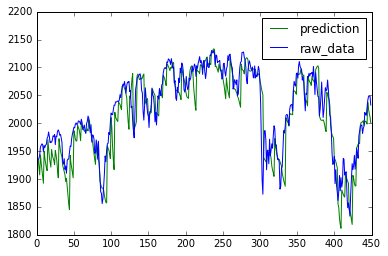

In [213]:
input_data_mini = input_data[:]
target_data_mini=target_data[:]
N_memory = 50
N_in = len(input_data[0])
N_hidden = int(0.2 * N_in)
N_out = 1
N_layer = 3


lstm = VanillaLSTM4(N_in, N_hidden, N_out, N_memory, is_initialized=True)

print ("start!")
st_s = time.time()
prediction = lstm.online_predict(input_data_mini, target_data_mini, 
                                 predict_length=5, N_epochs=0)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

N_pred = len(prediction)
plt.plot(prediction, label="prediction", c='g')
num_data = len(prediction)
plt.plot(target_data_mini[N_memory:N_memory + num_data], label="raw_data", c='b')
plt.ylim(1800, 2200)
plt.legend()

In [231]:
class VanillaLSTM5(object):
    def __init__(self, N_in, N_hidden, N_out, N_memory=100,
                 learning_rate=None, is_initialized=False):
        self.N_in = N_in
        self.N_hidden = N_hidden
        self.N_out = N_out
        self.N_memory = N_memory
        
        if is_initialized:
            sess = tf.InteractiveSession()
            tf.reset_default_graph() # reset the graph under sess
            sess.close()
        
        self._input = tf.placeholder(tf.float32, [N_memory, N_in])
        norm_input = tf.nn.l2_normalize(self._input, dim=0)
        self._target = tf.placeholder(tf.float32, [N_memory, N_out])
        # Build Model
        # self.W_in = self.weight_variable([N_in, N_hidden])
        # self.b_in = self.bias_variable([N_hidden])
        self.W_out = self.weight_variable([N_hidden, N_out])
        self.b_out = self.bias_variable([N_out])
        # reshape for batch computation
        # zs = tf.matmul(self._input, self.W_in) + self.b_in
        # this is for input of tf.rnn.rnn
        # zs_tilde = [tf.reshape(zs[i, :], [1, N_hidden]) for i in xrange(N_memory)]
        input_tilde = [tf.reshape(norm_input[i, :], [1, N_in]) for i in xrange(N_memory)]
        
        # build LSTM graph
        self.cell = cell = tf.nn.rnn_cell.BasicLSTMCell(N_hidden, activation=tf.nn.relu)
        self._initial_state = cell.zero_state(1, tf.float32)
        with tf.variable_scope("VanillaLSTM"):
            cell_outputs, state = tf.nn.rnn(cell=self.cell, inputs=input_tilde, initial_state=self._initial_state)
            # cell_outputs, state = tf.nn.rnn(cell=self.cell, inputs=input_tilde)
            self._final_state = state
        # get the sahpe back to N_memory * N_hidden
        cell_outputs = tf.pack(cell_outputs)
        pre_outputs = tf.squeeze(cell_outputs, [1])
        self.outputs = tf.matmul(pre_outputs, self.W_out) + self.b_out
        # training    
        print (self.outputs.get_shape().as_list(), self._target.get_shape().as_list())
        self.loss = tf.reduce_mean(tf.square(self.outputs - self._target))
        if learning_rate is None:
            optimizer = tf.train.AdamOptimizer()
        else:
            optimizer = tf.train.AdamOptimizer(learning_rate)
        self.train = optimizer.minimize(self.loss)
        
    def weight_variable(self, shape):
        initial = tf.truncated_normal(shape, stddev=0.1)
        return tf.Variable(initial)

    def bias_variable(self, shape):
        initial = tf.constant(0.0, shape=shape)
        return tf.Variable(initial)

    def online_predict(self, input_data, target_data, predict_length=1, N_epochs=1000):
        df_input = np.log(input_data[1:] / input_data[:-1])
        df_target = np.log(target_data[1:] / target_data[:-1])
        # additional input for prediction
        pred_input = tf.placeholder(tf.float32, [predict_length, N_in])
        norm_pred_input = tf.nn.l2_normalize(pred_input, dim=0)
        pred_input_tilde = [tf.reshape(norm_pred_input[t, :], [1, N_in]) for t in xrange(predict_length)]
        with tf.variable_scope("VanillaLSTM", reuse=True):
            cell_outputs, state = tf.nn.rnn(cell=self.cell, inputs=pred_input_tilde, initial_state=self._final_state)
        # get the sahpe back to predict_length * N_hidden
        cell_outputs = tf.pack(cell_outputs)
        pre_outputs = tf.squeeze(cell_outputs, [1])
        outputs = tf.matmul(pre_outputs, self.W_out) + self.b_out
        N_data = len(df_input)
        outputs_list = []
        init_op = tf.initialize_all_variables()
        with tf.Session() as sess:
            sess.run(init_op)
            for end in xrange(self.N_memory, N_data + predict_length, predict_length):
                beg = end - self.N_memory
                train_x = df_input[beg: end]
                if end + predict_length > N_data:
                    continue
                else:    
                    pred_x = df_input[end: end + predict_length]
                    pred_y = df_target[end: end + predict_length]
                    # pred_x = df_input[end  + predict_length - self.N_memory: end  + predict_length]
                train_y = df_target[beg: end]
                for i in xrange(N_epochs):
                    self.train.run(feed_dict={self._input: train_x, self._target: train_y})
                    # if i%10 == 0:
                print ("loss = %e" % self.loss.eval(session=sess, feed_dict={self._input: train_x, self._target: train_y}))
                print ("predict [%d, %d]" % (end, end + predict_length - 1))
                result = outputs[:, 0].eval(session=sess, feed_dict={self._input: train_x, pred_input: pred_x})
                # result = self.outputs[:, 0].eval(session=sess, feed_dict={self._input: pred_x})[-predict_length:]
                print (np.abs(np.cumprod(np.exp(result - pred_y[:, 0])) - 1.0))
                rate = np.exp(result)
                outputs_list += list(target_data[end][0] * np.cumprod(rate))
        return outputs_list

[50, 1] [50, 1]
start!
loss = 3.175622e-08
predict [50, 54]
[ 0.00453869  0.01954644  0.00908061  0.03663505  0.03321061]
loss = 9.171169e-11
predict [55, 59]
[ 0.05948367  0.08708288  0.15685661  0.21117243  0.1800107 ]
loss = 5.020679e-10
predict [60, 64]
[ 0.00716353  0.00236536  0.00767312  0.01435832  0.0011921 ]
loss = 8.605122e-11
predict [65, 69]
[ 0.01700043  0.00937569  0.0727403   0.12481776  0.12677505]
loss = 2.079557e-10
predict [70, 74]
[ 0.02510395  0.03322284  0.00898252  0.0383673   0.13302498]
loss = 2.093760e-10
predict [75, 79]
[ 0.03650468  0.0407589   0.05045688  0.11165478  0.11827504]
loss = 2.364711e-10
predict [80, 84]
[ 0.02724916  0.07622173  0.09667882  0.08876638  0.17459688]
loss = 3.007828e-10
predict [85, 89]
[ 0.04547244  0.08209316  0.07640356  0.09097669  0.06465312]
loss = 3.359180e-10
predict [90, 94]
[ 0.0747952   0.13051962  0.13173998  0.08351432  0.01041077]
loss = 3.518258e-10
predict [95, 99]
[ 0.02599313  0.04770277  0.06072489  0.07558432 

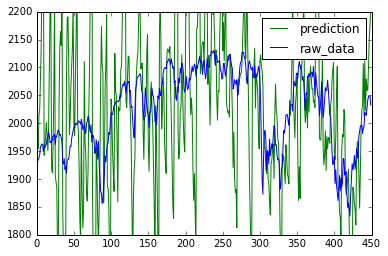

In [232]:
input_data_mini = input_data[:]
target_data_mini=target_data[:]
N_memory = 50
N_in = len(input_data[0])
N_hidden = int(0.2 * N_in)
N_out = 1
N_layer = 3


lstm = VanillaLSTM5(N_in, N_hidden, N_out, N_memory, is_initialized=True)

print ("start!")
st_s = time.time()
prediction = lstm.online_predict(input_data_mini, target_data_mini, 
                                 predict_length=5, N_epochs=100)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

N_pred = len(prediction)
plt.plot(prediction, label="prediction", c='g')
num_data = len(prediction)
plt.plot(target_data_mini[N_memory:N_memory + num_data], label="raw_data", c='b')
plt.ylim(1800, 2200)
plt.legend()

I might forget intializing internal states of LSTM. I will fix it.

In [278]:
class VanillaLSTM6(object):
    def __init__(self, N_in, N_hidden, N_out, N_memory=100,
                 learning_rate=None, is_initialized=False):
        self.N_in = N_in
        self.N_hidden = N_hidden
        self.N_out = N_out
        self.N_memory = N_memory
        
        if is_initialized:
            sess = tf.InteractiveSession()
            tf.reset_default_graph() # reset the graph under sess
            sess.close()
        
        self._input = tf.placeholder(tf.float32, [N_memory, N_in])
        self._target = tf.placeholder(tf.float32, [N_memory, N_out])
        # Build Model
        # self.W_in = self.weight_variable([N_in, N_hidden])
        # self.b_in = self.bias_variable([N_hidden])
        self.W_out = self.weight_variable([N_hidden, N_out])
        self.b_out = self.bias_variable([N_out])
        # reshape for batch computation
        # zs = tf.matmul(self._input, self.W_in) + self.b_in
        # this is for input of tf.rnn.rnn
        # zs_tilde = [tf.reshape(zs[i, :], [1, N_hidden]) for i in xrange(N_memory)]
        input_tilde = [tf.reshape(self._input[i, :], [1, N_in]) for i in xrange(N_memory)]
        
        # build LSTM graph
        self.cell = cell = tf.nn.rnn_cell.BasicLSTMCell(N_hidden, activation=tf.nn.relu)
        self._initial_state = cell.zero_state(1, tf.float32)
        self.LSTM_scope = "VanillaLSTM"
        with tf.variable_scope(self.LSTM_scope):
            cell_outputs, state = tf.nn.rnn(cell=self.cell,
                                            inputs=input_tilde, 
                                            scope=self.LSTM_scope, 
                                            initial_state=self._initial_state)
            # cell_outputs, state = tf.nn.rnn(cell=self.cell, inputs=input_tilde)
            self._final_state = state
        # get the sahpe back to N_memory * N_hidden
        cell_outputs = tf.pack(cell_outputs)
        pre_outputs = tf.squeeze(cell_outputs, [1])
        self.outputs = tf.matmul(pre_outputs, self.W_out) + self.b_out
        # training    
        print (self.outputs.get_shape().as_list(), self._target.get_shape().as_list())
        self.loss = tf.reduce_mean(tf.square(self.outputs - self._target))
        if learning_rate is None:
            optimizer = tf.train.AdamOptimizer()
        else:
            optimizer = tf.train.AdamOptimizer(learning_rate)
        self.train = optimizer.minimize(self.loss)
        
    def weight_variable(self, shape):
        initial = tf.truncated_normal(shape, stddev=0.1)
        return tf.Variable(initial)

    def bias_variable(self, shape):
        initial = tf.constant(0.0, shape=shape)
        return tf.Variable(initial)

    def online_predict(self, input_data, target_data, predict_length=1, N_epochs=1000):
        df_input = np.log(input_data[1:] / input_data[:-1])
        df_target = np.log(target_data[1:] / target_data[:-1])
        # additional input for prediction
        pred_input = tf.placeholder(tf.float32, [predict_length, N_in])
        pred_input_tilde = [tf.reshape(pred_input[t, :], [1, N_in]) for t in xrange(predict_length)]
        with tf.variable_scope(self.LSTM_scope, reuse=True):
            memory_state = tf.placeholder(tf.float32, self._initial_state.get_shape().as_list())
            cell_outputs, state = tf.nn.rnn(cell=self.cell,
                                            inputs=pred_input_tilde, 
                                            scope=self.LSTM_scope,
                                            initial_state=memory_state)
        # get the sahpe back to predict_length * N_hidden
        cell_outputs = tf.pack(cell_outputs)
        pre_outputs = tf.squeeze(cell_outputs, [1])
        outputs = tf.matmul(pre_outputs, self.W_out) + self.b_out
        N_data = len(df_input)
        outputs_list = []
        init_op = tf.initialize_all_variables()
        with tf.Session() as sess:
            sess.run(init_op)
            zero_state = self._initial_state.eval()
            for end in xrange(self.N_memory, N_data + predict_length, predict_length):
                beg = end - self.N_memory
                train_x = df_input[beg: end]
                if end + predict_length > N_data:
                    continue
                else:    
                    pred_x = df_input[end: end + predict_length]
                    pred_y = df_target[end: end + predict_length]
                    # pred_x = df_input[end  + predict_length - self.N_memory: end  + predict_length]
                train_y = df_target[beg: end]
                for i in xrange(N_epochs):
                    a = 1
                    sess.run(self.train, feed_dict={self._initial_state: zero_state, self._input: train_x, self._target: train_y})
                    # if i%10 == 0:
                print ("loss = %e" % self.loss.eval(session=sess, feed_dict={self._input: train_x, self._target: train_y}))
                print ("predict [%d, %d]" % (end, end + predict_length - 1))
                memory_val = self._final_state.eval(feed_dict={self._input: train_x})
                result = outputs[:, 0].eval(session=sess,
                                            feed_dict={memory_state: memory_val, pred_input: pred_x})
                # result = outputs[:, 0].eval(session=sess,
                #                          feed_dict={memory_state: self._initial_state.eval(), pred_input: pred_x})
                # result = self.outputs[:, 0].eval(session=sess, feed_dict={self._input: pred_x})[-predict_length:]
                print (np.abs(np.cumprod(np.exp(result - pred_y[:, 0])) - 1.0))
                rate = np.exp(result)
                outputs_list += list(target_data[end][0] * np.cumprod(rate))
        return outputs_list

[50, 1] [50, 1]
start!
loss = 2.685460e-06
predict [50, 54]
[ 0.00479495  0.00374551  0.00415082  0.00308483  0.00194602]
loss = 9.242854e-09
predict [55, 59]
[ 0.00665864  0.01042439  0.01581758  0.02161058  0.01489454]
loss = 5.756576e-11
predict [60, 64]
[ 0.0080231   0.02237531  0.03439937  0.03799267  0.04426032]
loss = 1.283674e-09
predict [65, 69]
[ 0.00445216  0.00696026  0.01747154  0.01665989  0.0128207 ]
loss = 4.067655e-10
predict [70, 74]
[ 0.00097506  0.00330317  0.00947762  0.01156429  0.02549896]
loss = 4.970080e-10
predict [75, 79]
[ 0.01272418  0.0170654   0.03036846  0.03721439  0.03249611]
loss = 1.777834e-10
predict [80, 84]
[ 0.00051278  0.00503974  0.00321642  0.00111893  0.01635819]
loss = 4.765194e-09
predict [85, 89]
[ 0.01498684  0.03419111  0.03678216  0.04857907  0.05577497]
loss = 1.334471e-09
predict [90, 94]
[ 0.01215631  0.01022492  0.00569214  0.01030856  0.01474786]
loss = 9.343367e-11
predict [95, 99]
[ 0.00409355  0.0033902   0.00673625  0.00786748 

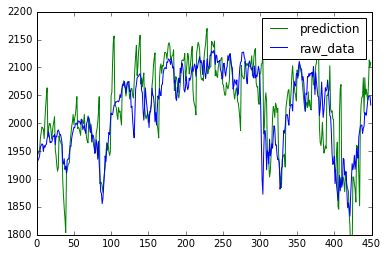

In [287]:
input_data_mini = input_data[:]
target_data_mini=target_data[:]
N_memory = 50
N_in = len(input_data[0])
N_hidden = int(0.2 * N_in)
N_out = 1
N_layer = 3


lstm = VanillaLSTM6(N_in, N_hidden, N_out, N_memory, is_initialized=True)

print ("start!")
st_s = time.time()
prediction = lstm.online_predict(input_data_mini, target_data_mini, 
                                 predict_length=5, N_epochs=100)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

N_pred = len(prediction)
plt.plot(prediction, label="prediction", c='g')
num_data = len(prediction)
plt.plot(target_data_mini[N_memory:N_memory + num_data], label="raw_data", c='b')
plt.ylim(1800, 2200)
plt.legend()

[50, 1] [50, 1]
start!
loss = 4.063847e-05
predict [50, 59]
[ 0.01103814  0.01340498  0.01443861  0.01267832  0.00687416  0.00619666
  0.00810461  0.01054764  0.01854224  0.01378673]
loss = 2.192663e-05
predict [60, 69]
[ 0.00549777  0.00971075  0.0141146   0.01264387  0.01529355  0.01554653
  0.02726227  0.04100475  0.04760355  0.05210884]
loss = 1.907412e-05
predict [70, 79]
[ 0.00105456  0.00116707  0.00232585  0.00368095  0.01598977  0.01122933
  0.01547939  0.01384518  0.01636309  0.02171593]
loss = 1.907284e-05
predict [80, 89]
[ 0.0018981   0.00074673  0.0016831   0.004204    0.02123087  0.02186641
  0.01528947  0.02510469  0.02202091  0.02864673]
loss = 2.630731e-05
predict [90, 99]
[ 0.01317942  0.01569043  0.01786625  0.02588268  0.03402498  0.0363684
  0.0454843   0.05259205  0.05757791  0.05946654]
loss = 2.984294e-05
predict [100, 109]
[ 0.00102973  0.00267413  0.00417018  0.00315148  0.00549052  0.01036305
  0.0121366   0.0143879   0.01608395  0.0240485 ]
loss = 2.477957e

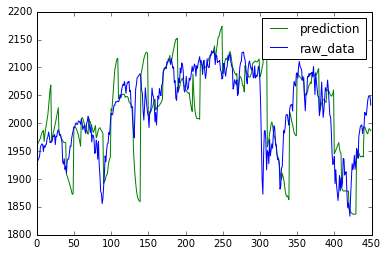

In [288]:
input_data_mini = input_data[:]
target_data_mini=target_data[:]
N_memory = 50
N_in = len(input_data[0])
N_hidden = int(0.2 * N_in)
N_out = 1
N_layer = 3


lstm = VanillaLSTM6(N_in, N_hidden, N_out, N_memory, is_initialized=True)

print ("start!")
st_s = time.time()
prediction = lstm.online_predict(input_data_mini, target_data_mini, 
                                 predict_length=10, N_epochs=1)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

N_pred = len(prediction)
plt.plot(prediction, label="prediction", c='g')
num_data = len(prediction)
plt.plot(target_data_mini[N_memory:N_memory + num_data], label="raw_data", c='b')
plt.ylim(1800, 2200)
plt.legend()

In the chainer, memory cell is always initialized. So, let's initialize state and predict.

In [293]:
class VanillaLSTM7(object):
    def __init__(self, N_in, N_hidden, N_out, N_memory=100,
                 learning_rate=None, is_initialized=False):
        self.N_in = N_in
        self.N_hidden = N_hidden
        self.N_out = N_out
        self.N_memory = N_memory
        
        if is_initialized:
            sess = tf.InteractiveSession()
            tf.reset_default_graph() # reset the graph under sess
            sess.close()
        
        self._input = tf.placeholder(tf.float32, [N_memory, N_in])
        self._target = tf.placeholder(tf.float32, [N_memory, N_out])
        # Build Model
        # self.W_in = self.weight_variable([N_in, N_hidden])
        # self.b_in = self.bias_variable([N_hidden])
        self.W_out = self.weight_variable([N_hidden, N_out])
        self.b_out = self.bias_variable([N_out])
        # reshape for batch computation
        # zs = tf.matmul(self._input, self.W_in) + self.b_in
        # this is for input of tf.rnn.rnn
        # zs_tilde = [tf.reshape(zs[i, :], [1, N_hidden]) for i in xrange(N_memory)]
        input_tilde = [tf.reshape(self._input[i, :], [1, N_in]) for i in xrange(N_memory)]
        
        # build LSTM graph
        self.cell = cell = tf.nn.rnn_cell.BasicLSTMCell(N_hidden, activation=tf.nn.relu)
        self._initial_state = cell.zero_state(1, tf.float32)
        self.LSTM_scope = "VanillaLSTM"
        with tf.variable_scope(self.LSTM_scope):
            cell_outputs, state = tf.nn.rnn(cell=self.cell,
                                            inputs=input_tilde, 
                                            scope=self.LSTM_scope, 
                                            initial_state=self._initial_state)
            # cell_outputs, state = tf.nn.rnn(cell=self.cell, inputs=input_tilde)
            self._final_state = state
        # get the sahpe back to N_memory * N_hidden
        cell_outputs = tf.pack(cell_outputs)
        pre_outputs = tf.squeeze(cell_outputs, [1])
        self.outputs = tf.matmul(pre_outputs, self.W_out) + self.b_out
        # training    
        print (self.outputs.get_shape().as_list(), self._target.get_shape().as_list())
        self.loss = tf.reduce_mean(tf.square(self.outputs - self._target))
        if learning_rate is None:
            optimizer = tf.train.AdamOptimizer()
        else:
            optimizer = tf.train.AdamOptimizer(learning_rate)
        self.train = optimizer.minimize(self.loss)
        
    def weight_variable(self, shape):
        initial = tf.truncated_normal(shape, stddev=0.1)
        return tf.Variable(initial)

    def bias_variable(self, shape):
        initial = tf.constant(0.0, shape=shape)
        return tf.Variable(initial)

    def online_predict(self, input_data, target_data, predict_length=1, N_epochs=1000):
        df_input = np.log(input_data[1:] / input_data[:-1])
        df_target = np.log(target_data[1:] / target_data[:-1])
        # additional input for prediction
        pred_input = tf.placeholder(tf.float32, [predict_length, N_in])
        pred_input_tilde = [tf.reshape(pred_input[t, :], [1, N_in]) for t in xrange(predict_length)]
        with tf.variable_scope(self.LSTM_scope, reuse=True):
            # memory_state = tf.placeholder(tf.float32, self._initial_state.get_shape().as_list())
            cell_outputs, state = tf.nn.rnn(cell=self.cell,
                                            inputs=pred_input_tilde, 
                                            scope=self.LSTM_scope,
                                            initial_state=self._initial_state)
        # get the sahpe back to predict_length * N_hidden
        cell_outputs = tf.pack(cell_outputs)
        pre_outputs = tf.squeeze(cell_outputs, [1])
        outputs = tf.matmul(pre_outputs, self.W_out) + self.b_out
        N_data = len(df_input)
        outputs_list = []
        init_op = tf.initialize_all_variables()
        with tf.Session() as sess:
            sess.run(init_op)
            zero_state = self._initial_state.eval()
            for end in xrange(self.N_memory, N_data + predict_length, predict_length):
                beg = end - self.N_memory
                train_x = df_input[beg: end]
                if end + predict_length > N_data:
                    continue
                else:    
                    pred_x = df_input[end: end + predict_length]
                    pred_y = df_target[end: end + predict_length]
                    # pred_x = df_input[end  + predict_length - self.N_memory: end  + predict_length]
                train_y = df_target[beg: end]
                for i in xrange(N_epochs):
                    a = 1
                    sess.run(self.train, feed_dict={self._initial_state: zero_state, self._input: train_x, self._target: train_y})
                    # if i%10 == 0:
                print ("loss = %e" % self.loss.eval(session=sess, feed_dict={self._input: train_x, self._target: train_y}))
                print ("predict [%d, %d]" % (end, end + predict_length - 1))
                # memory_val = self._final_state.eval(feed_dict={self._input: train_x})
                result = outputs[:, 0].eval(session=sess,
                                            feed_dict={self._initial_state: zero_state, pred_input: pred_x})
                # result = outputs[:, 0].eval(session=sess,
                #                          feed_dict={memory_state: self._initial_state.eval(), pred_input: pred_x})
                # result = self.outputs[:, 0].eval(session=sess, feed_dict={self._input: pred_x})[-predict_length:]
                print (np.abs(np.cumprod(np.exp(result - pred_y[:, 0])) - 1.0))
                rate = np.exp(result)
                outputs_list += list(target_data[end][0] * np.cumprod(rate))
        return outputs_list

[50, 1] [50, 1]
start!
loss = 5.525543e-07
predict [50, 54]
[ 0.01576603  0.01793859  0.02142978  0.01673736  0.00526571]
loss = 1.051057e-07
predict [55, 59]
[ 0.00219773  0.00876893  0.01150513  0.01336601  0.02358635]
loss = 5.278522e-09
predict [60, 64]
[ 0.00160671  0.01114428  0.01809152  0.0169684   0.01990027]
loss = 2.353789e-09
predict [65, 69]
[ 0.00568251  0.00423081  0.01653863  0.01529417  0.01053309]
loss = 2.354985e-10
predict [70, 74]
[ 0.00068533  0.00108907  0.00846453  0.01461042  0.03305078]
loss = 2.895734e-10
predict [75, 79]
[ 0.00486213  0.00180723  0.00911688  0.02437062  0.02888631]
loss = 7.596841e-10
predict [80, 84]
[ 0.00156636  0.0051225   0.01501292  0.02291608  0.04341584]
loss = 1.475146e-08
predict [85, 89]
[ 0.00084506  0.00933296  0.00173634  0.01016875  0.01230148]
loss = 3.777043e-10
predict [90, 94]
[ 0.00902439  0.00643065  0.00456047  0.01039959  0.01776839]
loss = 1.022866e-10
predict [95, 99]
[ 0.00285636  0.00257881  0.0055051   0.01048429 

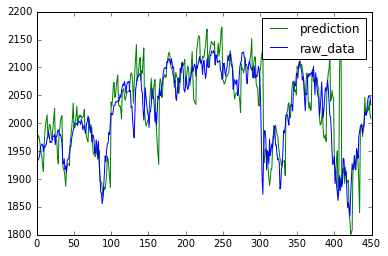

In [295]:
input_data_mini = input_data[:]
target_data_mini=target_data[:]
N_memory = 50
N_in = len(input_data[0])
N_hidden = int(0.2 * N_in)
N_out = 1
N_layer = 3


lstm = VanillaLSTM7(N_in, N_hidden, N_out, N_memory, is_initialized=True)

print ("start!")
st_s = time.time()
prediction = lstm.online_predict(input_data_mini, target_data_mini, 
                                 predict_length=5, N_epochs=100)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

N_pred = len(prediction)
plt.plot(prediction, label="prediction", c='g')
num_data = len(prediction)
plt.plot(target_data_mini[N_memory:N_memory + num_data], label="raw_data", c='b')
plt.ylim(1800, 2200)
plt.legend()

[50, 1] [50, 1]
start!
loss = 4.135357e-05
predict [50, 54]
[  8.15556329e-03   8.63436739e-03   8.89152794e-03   7.43210066e-03
   7.26594856e-05]
loss = 3.710437e-05
predict [55, 59]
[ 0.00190359  0.00171498  0.00059659  0.01217231  0.00965616]
loss = 2.334803e-05
predict [60, 64]
[ 0.00233236  0.0016587   0.00227029  0.00265599  0.00334496]
loss = 2.070145e-05
predict [65, 69]
[ 0.00349807  0.00947196  0.02126809  0.02519183  0.02696664]
loss = 2.642842e-05
predict [70, 74]
[ 0.00146183  0.00409114  0.00425791  0.0068151   0.00240229]
loss = 2.613771e-05
predict [75, 79]
[ 0.00865508  0.00797702  0.01078728  0.00916826  0.00932822]
loss = 2.569918e-05
predict [80, 84]
[ 0.00312675  0.00033928  0.00290734  0.0047548   0.02147245]
loss = 2.616203e-05
predict [85, 89]
[ 0.00312242  0.00157926  0.00883005  0.00668727  0.01637285]
loss = 2.785917e-05
predict [90, 94]
[ 0.01127357  0.01147054  0.0098792   0.01152792  0.01405638]
loss = 2.860742e-05
predict [95, 99]
[ 0.00191114  0.0025084

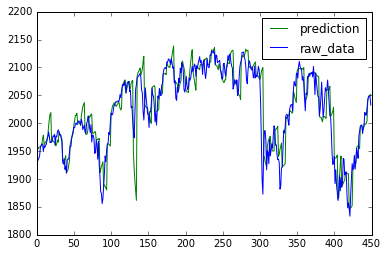

In [297]:
input_data_mini = input_data[:]
target_data_mini=target_data[:]
N_memory = 50
N_in = len(input_data[0])
N_hidden = int(0.2 * N_in)
N_out = 1
N_layer = 3


lstm = VanillaLSTM7(N_in, N_hidden, N_out, N_memory, is_initialized=True)

print ("start!")
st_s = time.time()
prediction = lstm.online_predict(input_data_mini, target_data_mini, 
                                 predict_length=5, N_epochs=0)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

N_pred = len(prediction)
plt.plot(prediction, label="prediction", c='g')
num_data = len(prediction)
plt.plot(target_data_mini[N_memory:N_memory + num_data], label="raw_data", c='b')
plt.ylim(1800, 2200)
plt.legend()

Even in Chainer, model without learning looks better

In [1]:
1

1

In [2]:
import tensorflow as tf

In [ ]:
a = tf.constant([])